# Índice
1. [Descrição do projecto](#projecto)
2. [Obtenção dos dados](#dados)
3. [Tratamento de dados ausentes](#dadosAusentes)  
    3.1 [Outro método para tratar dados ausentes](#dadosAusentesAlternativa)  
4. [Análise de dados](#analiseDados)       
    4.1 [Tipo de ratos (Control or Ts65Dn)](#tipoRatos)  
    4.2 [Tipo de tratamento (Memantine or Saline)](#tipoTratamento)  
    4.3 [Tipo de comportamento (stimulated to learn or not)](#tipoComportamento)  
    4.4 [Classe dos ratos](#class)   
5. [Modelos Supervisionados](#supervisionados)     
    5.1 [Regressão linear](#regressaoLinear)  
    5.2 [Regressão logistica](#regressaoLogistica)  
    5.3 [K Nearest Neighbors (KNNs) ](#knn)  
    5.4 [Decision Trees and Random Forests ](#trees)  
    5.5 [Support Vector Machine ](#svm)  
6. [Modelos não Supervisionados](#nsupervisionados)      
     6.1 [K-Means](#kmeans)  
     6.2 [Principal Component Analysis](#pca) 
7. [Bibliografia](#bib)
    

# Mice Protein Expression <a name="projecto"></a>



Expression levels of 77 proteins measured in the cerebral cortex  
(https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression)  

Context
Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome mice exposed to context fear conditioning, a task used to assess associative learning.

Content
The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. There are 38 control mice and 34 trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per sample/mouse. Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. The dataset contains a total of 1080 measurements per protein. Each measurement can be considered as an independent sample/mouse.

The eight classes of mice are described based on features such as genotype, behavior and treatment. According to genotype, mice can be control or trisomic. According to behavior, some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to assess the effect of the drug memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not.

Classes:

c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)

c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)

c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)

c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)

t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)

t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)

t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)

t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

Attribute Information
[1] Mouse ID

[2:78] Values of expression levels of 77 proteins; the names of proteins are followed by N indicating that they were measured in the nuclear fraction. *For example: DYRK1A_n*

[79] Genotype: control (c) or trisomy (t)

[80] Treatment type: memantine (m) or saline (s)

[81] Behavior: context-shock (CS) or shock-context (SC)

[82] Class: c-CS-s, c-CS-m, c-SC-s, c-SC-m, t-CS-s, t-CS-m, t-SC-s, t-SC-m

Acknowledgements
Clara Higuera Department of Software Engineering and Artificial Intelligence, Faculty of Informatics and the Department of Biochemistry and Molecular Biology, Faculty of Chemistry, University Complutense, Madrid, Spain. Email: clarahiguera at ucm.es

Katheleen J. Gardiner, creator and owner of the protein expression data, is currently with the Linda Crnic Institute for Down Syndrome, Department of Pediatrics, Department of Biochemistry and Molecular Genetics, Human Medical Genetics and Genomics, and Neuroscience Programs, University of Colorado, School of Medicine, Aurora, Colorado, USA. Email: katheleen.gardiner at ucdenver.edu

Krzysztof J. Cios is currently with the Department of Computer Science, Virginia Commonwealth University, Richmond, Virginia, USA, and IITiS Polish Academy of Sciences, Poland. Email: kcios at vcu.edu

Source: UC Irvine Machine Learning Repository

Inspiration
The aim is to identify subsets of proteins that are discriminant between the classes.

# Obter os dados <a name="dados"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("Data_Cortex_Nuclear.csv")

In [3]:
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
MouseID            1080 non-null object
DYRK1A_N           1077 non-null float64
ITSN1_N            1077 non-null float64
BDNF_N             1077 non-null float64
NR1_N              1077 non-null float64
NR2A_N             1077 non-null float64
pAKT_N             1077 non-null float64
pBRAF_N            1077 non-null float64
pCAMKII_N          1077 non-null float64
pCREB_N            1077 non-null float64
pELK_N             1077 non-null float64
pERK_N             1077 non-null float64
pJNK_N             1077 non-null float64
PKCA_N             1077 non-null float64
pMEK_N             1077 non-null float64
pNR1_N             1077 non-null float64
pNR2A_N            1077 non-null float64
pNR2B_N            1077 non-null float64
pPKCAB_N           1077 non-null float64
pRSK_N             1077 non-null float64
AKT_N              1077 non-null float64
BRAF_N             1077 non-null 

# Tratamento de dados ausentes <a name="dadosAusentes"></a>

A grande maioria dos algoritmos de Machine Learning não funcionam com dados ausentes.  
#### Algumdas das estratégias para lidar com esta falta de dados são:
- A mais facil de lidar com esta falta de dados é eliminar as linhas onde eles estão.
- Preencher esses dados com valores (0, a média da coluna, mediana, moda ou outro valor estimado, valor do dado anterior).
- Interpolação

Alguns dos algoritmos que suportam valores ausentes são k-Nearest Neighbors, que ignora as colunas que tem estes dados em falta.   
Classification e Regression Trees tambem funcionam com valores ausentes e tratam-nos como um valor unico e diferente na construção do algoritmo. A implementação destes algoritmos, Classification e Regression Tree, atraves do scikit-learn ainda não está preparada para lidar com valores ausentes.    

#### Pode-se dividir os dados em dois tipos:
Atemporaris: as características dos sobreviventes do Titanic ou os tamanhos de pétalas de flores  
Temporais: variações da moeda ao longo de um dia ou o tráfego de utilizadores por hora  

Quando se trata dados ausentes atemporais, o mais simples é remover as linhas que têm falta de dados. Isso porque muitos dos algoritmos não conseguem fazer análises com dados ausentes e, na maioria dos casos, o conjunto de dados é grande o suficiente para que a remoção de algumas linhas tenha pouca influência.  

No entanto, quando se trata de dados temporais, a remoção de um dado pode ser bastante problemática. Os dados precisam de cadência, padrão, especialmente se for para fazer análises de frequência.   
#### Para dados temporais as alternativas são:
<img src="fotos/dadosausentes1.png" width="400"/>

- Substituir os dados ausentes pela média da coluna: A média do conjunto todo permanece a mesma, mas as características estatísticas alteram-se. Como adiciona-se um ou mais dados perto da média, o desvio padrão do conjunto de dados tende a cair.
<img src="fotos/dadosausentes2.png" width="400"/>
<img src="fotos/dadosausentes3.png" width="400"/>
- Interpolação: É um método matemático que ajusta uma função ao seu dado e usa essa função para extrapolar os dados que faltam. A interpolação mais simples que existe é a linear, que faz uma média entre os valores anterior e posterior do dado ausente.
<img src="fotos/dadosausentes4.png" width="400"/>
- Interpolação de dados sem padrão conhecido: No caso de não conhecer-se o padrão dos dados e não termos como prever com certeza o ponto que foi perdido, a interpolação linear não deve ser usada porque o padrão entre pontos não é linear.
<img src="fotos/dadosausentes5.png" width="400"/>
Neste caso o preenchimento dos dados ausentes pela média da série faz mais sentido. Porque nenhum dado vai representar o ponto perdido, mas a média faz com que a série passe a ser contínua sem alterar a média da série inteira.
<img src="fotos/dadosausentes6.png" width="400"/>
- Substituição por outros dados: Substituir os dados ausentes pelos dados próximos. Podemos substituir, por exemplo, pelo dado anterior ou posterior.
<img src="fotos/dadosausentes7.png" width="400"/>
<img src="fotos/dadosausentes8.png" width="400"/>
Se os dados têm um padrão conhecido, a interpolação pode ser útil, mas se o padrão é desconhecido tem-se de avaliar bem o tipo de análises que se pretendem fazer antes de escolher o metodo para o preenchimento dos dados ausentes. 
<img src="fotos/dadosausentes9.png" width="600"/>

In [5]:
# Soma dos valores nulos por coluna
null = df.isnull().sum()
sorted(null, reverse=True)[:10]

[285, 270, 213, 210, 180, 75, 18, 18, 7, 3]

In [6]:
# percentagem dos valores nulos por coluna
percent = df.isnull().sum()/len(df)
sorted(percent, reverse=True)[:10]

[0.2638888888888889,
 0.25,
 0.19722222222222222,
 0.19444444444444445,
 0.16666666666666666,
 0.06944444444444445,
 0.016666666666666666,
 0.016666666666666666,
 0.006481481481481481,
 0.002777777777777778]

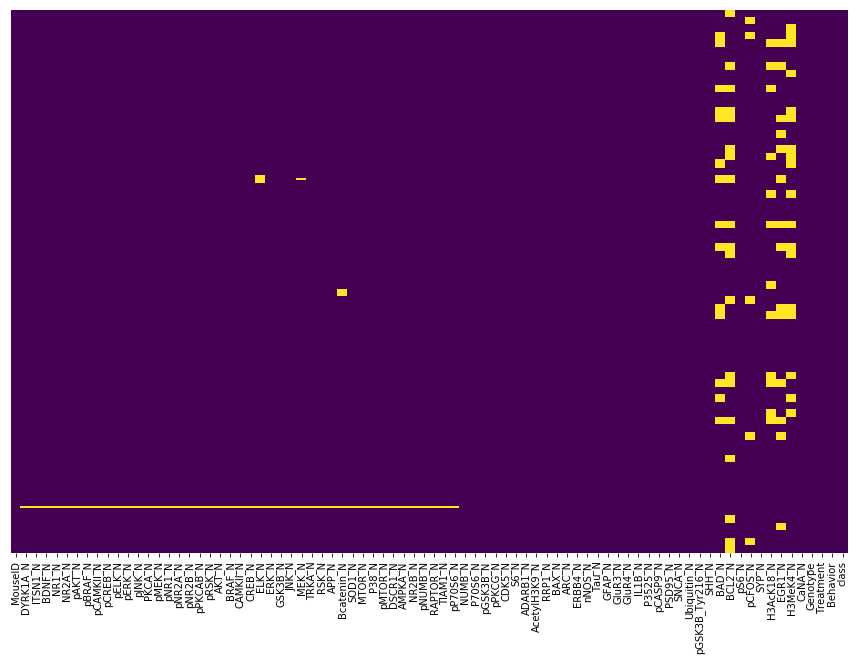

In [7]:
# Visualização dos valores nulos
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [8]:
# Colunas onde os valores nulos são superiores a 10
null = df.loc[:,df.isnull().sum()>10]
null.head()

,ELK_N,Bcatenin_N,BAD_N,BCL2_N,pCFOS_N,H3AcK18_N,EGR1_N,H3MeK4_N
0,1.866358,3.037621,0.122652,NaN,0.108336,0.114783,0.131790,0.128186
1,1.761047,2.921882,0.116682,NaN,0.104315,0.111974,0.135103,0.131119
2,1.765544,2.944136,0.118508,NaN,0.106219,0.111883,0.133362,0.127431
3,1.286277,2.500204,0.132781,NaN,0.111262,0.130405,0.147444,0.146901
4,1.324695,2.456560,0.129954,NaN,0.110694,0.118481,0.140314,0.148380


In [9]:
# Preencher os valores ausentes por coluna
df["ELK_N"].fillna(value = df["ELK_N"].mean(), inplace = True)
df["Bcatenin_N"].fillna(value = df["Bcatenin_N"].mean(), inplace = True)
df["BAD_N"].fillna(value = df["BAD_N"].mean(), inplace = True)
df["BCL2_N"].fillna(value = df["BCL2_N"].mean(), inplace = True)
df["pCFOS_N"].fillna(value = df["pCFOS_N"].mean(), inplace = True)
df["H3AcK18_N"].fillna(value = df["H3AcK18_N"].mean(), inplace = True)
df["EGR1_N"].fillna(value = df["EGR1_N"].mean(), inplace = True)
df["H3MeK4_N"].fillna(value = df["H3MeK4_N"].mean(), inplace = True)


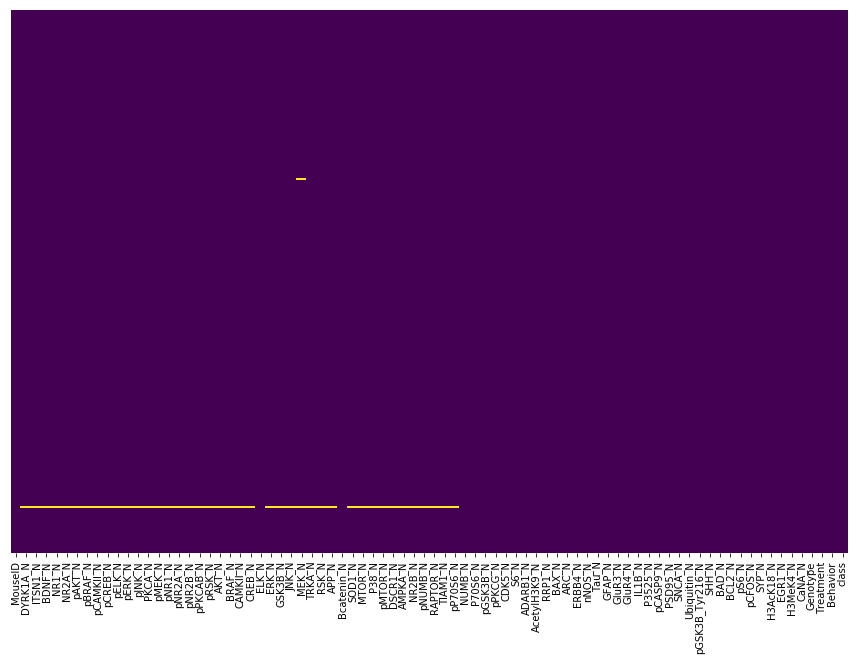

In [10]:
# Visualização dos valores ausentes
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [11]:
# Apagar as linhas com valores ausentes
df.dropna(inplace=True)

In [12]:
# Verificar se já não existem valores ausentes
null = df.isnull().sum()
sorted(null, reverse=True)[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [13]:
# Reduziu-se para 1073 linhas
df.shape

(1073, 82)

## Outro método para tratar dados ausentes  <a name="dadosAusentesAlternativa"></a>




Neste caso todos os valores ausentes serão substituidos pela média da coluna e não se apagaram linhas

In [13]:
#from sklearn.impute import SimpleImputer

In [14]:
#Retirar as variaveis não numéricas
#df1 = df.drop(["MouseID", "Genotype", "Treatment","Behavior","class"],axis=1)

In [15]:
# Tranformar o DataFrame num array
#values = df1.values
#type(values)

In [16]:
# Escolher a estratégia de preenchimento dos dados
#imputer = SimpleImputer(strategy='mean')

In [17]:
# Dados tranformados
#transformed_values = imputer.fit_transform(values)

In [18]:
#dftrans = pd.DataFrame(transformed_values, columns=df1.columns)

In [19]:
# Voltar a adicionar as variaveis não númericas ao DataFrame
#dftrans.insert(loc=0,column="MouseID",value=df["MouseID"])

In [20]:
#dftrans.insert(loc=len(dftrans.columns),column="Genotype",value=df["Genotype"])

In [21]:
#dftrans.insert(loc=len(dftrans.columns),column="Treatment",value=df["Treatment"])

In [22]:
#dftrans.insert(loc=len(dftrans.columns),column="Behavior",value=df["Behavior"])

In [23]:
#dftrans.insert(loc=len(dftrans.columns),column="class",value=df["class"])

In [24]:
#dftrans.head()

In [79]:
# Verificar se já não existem valores ausentes
#null = dftrans.isnull().sum()
#sorted(null, reverse=True)[:10]

# Análise de dados <a name="analiseDados"></a>


In [13]:
df.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,...,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000
mean,0.425835,0.617236,0.319076,2.297489,3.844337,0.233630,0.182174,3.540892,0.212658,1.429092,...,0.226733,0.157849,0.134758,0.121544,0.131144,0.446174,0.169723,0.183135,0.205488,1.336910
std,0.249814,0.252083,0.049468,0.347854,0.934809,0.040833,0.026382,1.296090,0.032605,0.467696,...,0.029039,0.026519,0.023595,0.014318,0.023052,0.066625,0.054366,0.036370,0.048199,0.317962
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.086351,0.098007,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288087,0.473041,0.287250,2.057382,3.155426,0.205892,0.164766,2.479834,0.190833,1.202915,...,0.206449,0.140966,0.119932,0.110721,0.114380,0.397923,0.133767,0.159147,0.174059,1.081228
50%,0.366011,0.565782,0.316521,2.298053,3.763100,0.231315,0.182496,3.331039,0.210681,1.356106,...,0.223953,0.157914,0.134762,0.121738,0.128584,0.448630,0.169609,0.183135,0.205440,1.314201
75%,0.487969,0.699581,0.348346,2.528499,4.443305,0.257385,0.197523,4.482446,0.234634,1.562103,...,0.241687,0.167413,0.139454,0.131990,0.142590,0.491022,0.187597,0.196402,0.219259,1.586359
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


## Tipo de ratos (Control or Ts65Dn) <a name="tipoRatos"></a>

In [14]:
df["Genotype"].value_counts()

Control    566
Ts65Dn     507
Name: Genotype, dtype: int64

Os ratos têm sido usados para estudar o Sindrome de Dawn devido à parecenca entre os genomas de humanos e ratos.
A trissomia 21, uma cópia extra do cromossoma 21(Hsa21) é responsavel pela Sindrome de Dawn. O cromossoma 16 dos ratos assemelha-se ao 21 dos humanos.  
fonte: https://en.wikipedia.org/wiki/Mouse_models_of_Down_syndrome

38 ratos de controlo - 38x15 leituras por rato = 566 leituras (após retirar as linhas com valores nulos)  
34 ratos com trissomia - 34x15 leituras = 507 leituras


## Tipo de tratamento (Memantine or Saline) <a name="tipoTratamento"></a>

In [15]:
df["Treatment"].value_counts()

Memantine    570
Saline       503
Name: Treatment, dtype: int64

Para avaliar o efeito da Memantina foram feitas:  
570 leituras de ratos injectados com Memantina.  
503 leituras de ratos injectados com solução salina.

Memantina é um farmaco utilizado no tratamento da Doença de Alzheimer, que pensa-se melhorar a memoria em pessoas com sindrome de Down.  
A solução salina foi usada como placebo.


## Tipo de comportamento (stimulated to learn or not) <a name="tipoComportamento"></a>

In [16]:
df["Behavior"].value_counts()

S/C    552
C/S    521
Name: Behavior, dtype: int64

552 leituras de ratos que foram estimulados a aprender.  
521 leituras de ratos que não foram estimuados.

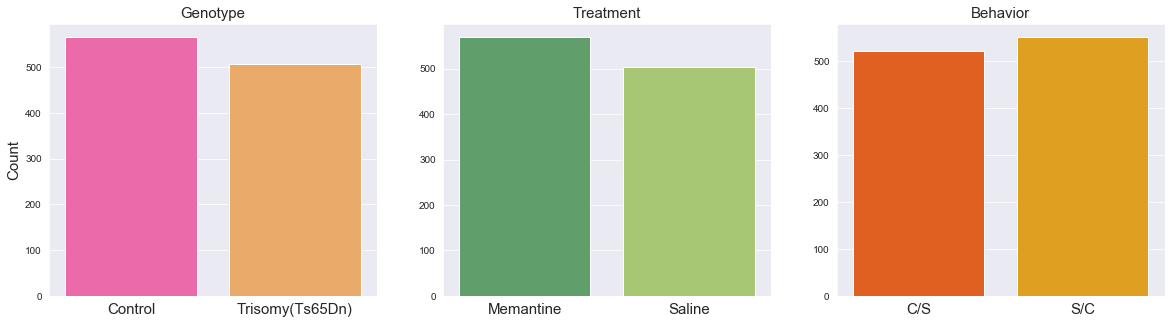

In [17]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

ax1 = sns.countplot("Genotype", data=df, ax=ax[0], palette="spring")
ax1.set_title("Genotype", size=15)
ax1.set_ylabel("Count", size=15)
ax1.set_xlabel("")
ax1.set_xticklabels(["Control","Trisomy(Ts65Dn)"], size=15)

ax2 = sns.countplot("Treatment", data=df, ax=ax[1], palette="summer")
ax2.set_title("Treatment", size=15)
ax2.set_ylabel("")
ax2.set_xlabel("")
ax2.set_xticklabels(ax2.get_xticklabels(), size=15)

ax3 = sns.countplot("Behavior", data=df, ax=ax[2], palette="autumn")
ax3.set_title("Behavior", size=15)
ax3.set_ylabel("")
ax3.set_xlabel("")
ax3.set_xticklabels(ax3.get_xticklabels(), size=15)

plt.show()

## Classe dos ratos <a name="class"></a>

In [18]:
df["class"].value_counts()

c-SC-m    150
c-CS-m    150
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    132
c-CS-s    131
t-CS-s    105
Name: class, dtype: int64

150 leitura c-CS-s: rato controlo, estimulado a aprender, injectado com salina  
150 leitura c-CS-m: rato controlo, estimulado a aprender, injected com memantina    
135 leituras c-SC-s: rato controlo, não estimulado a aprender, injectado com salina  
135 leituras c-SC-m: rato controlo, não estimulado a aprender,  injected com memantina    
135 leituras t-CS-s: rato com trissomia, estimulado a aprender, injectado com salina  
132 leitturas t-CS-m: rato com trissomia, estimulado a aprender, injected com memantina    
131 leituras t-SC-s: rato com trissomia, não estimulado a aprender,  injectado com salina   
105 leituras t-SC-m: rato com trissomia, não estimulado a aprender, injected com memantina    

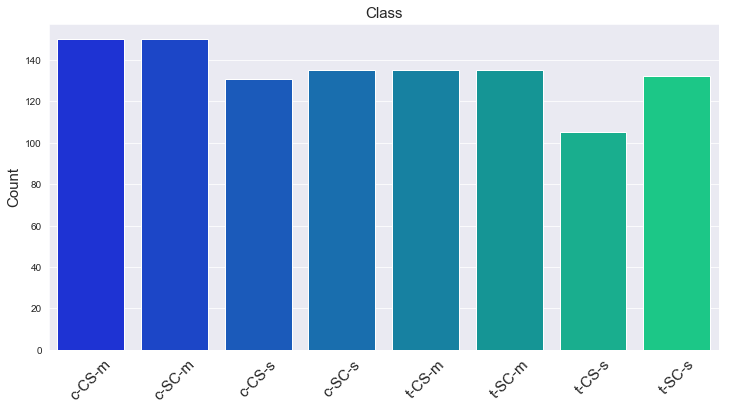

In [19]:
plt.figure(figsize=(12,6))
ax = sns.countplot("class", data=df, palette="winter")
ax.set_title("Class", size=15)
ax.set_ylabel("Count", size=15)
ax.set_xlabel("")
ax.set_xticklabels(ax.get_xticklabels(), size=15, rotation=45)

plt.show()

### Agrupar por Genótipo para tentar perceber a influencia da proteina na classificação dos ratos como de controlo ou Ts65Dn <a name="agrupamentoGenotipo"></a>

In [20]:
genotype = df.groupby("Genotype").mean()
genotype

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
Genotype,,,,,,,,,,,,,,,,,,,,,
Control,0.404654,0.575891,0.321122,2.334329,3.986446,0.230429,0.182133,3.512127,0.207407,1.444035,...,0.226905,0.157260,0.135275,0.123408,0.132900,0.460523,0.159268,0.188313,0.20098,1.322933
Ts65Dn,0.449480,0.663394,0.316791,2.256362,3.685690,0.237204,0.182220,3.573004,0.218520,1.412411,...,0.226541,0.158508,0.134182,0.119462,0.129183,0.430156,0.181396,0.177355,0.21052,1.352512


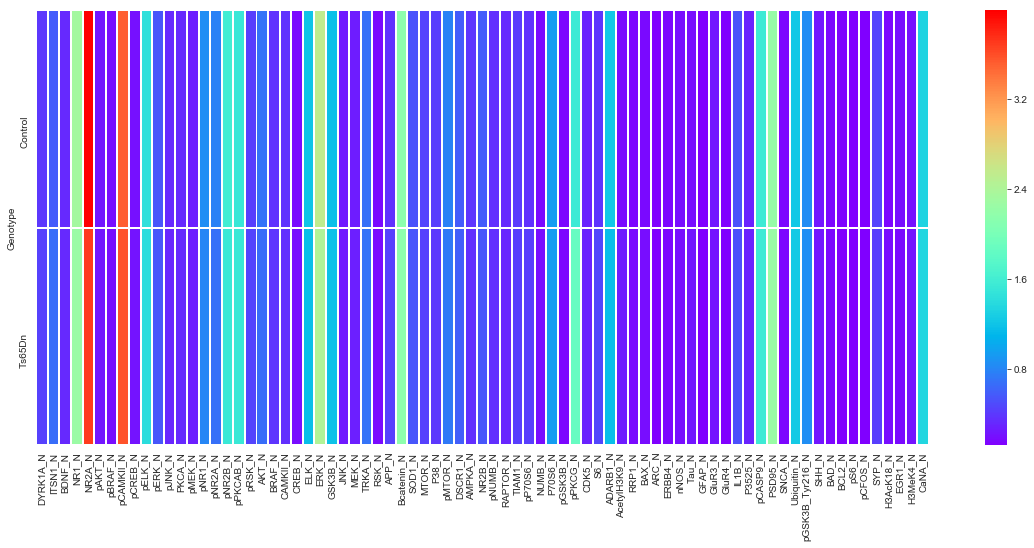

In [21]:
plt.figure(figsize=(20,8))
sns.heatmap(genotype, cmap="rainbow", linecolor="white", linewidths=1)

Pelo gráfico de calor não se consegue identificar as diferenças entre ratos de controlo e com trissomia, porque as leituras 
registradas são semelhantes para os dois tipos. Vamos tentar com o gráfico de barras.

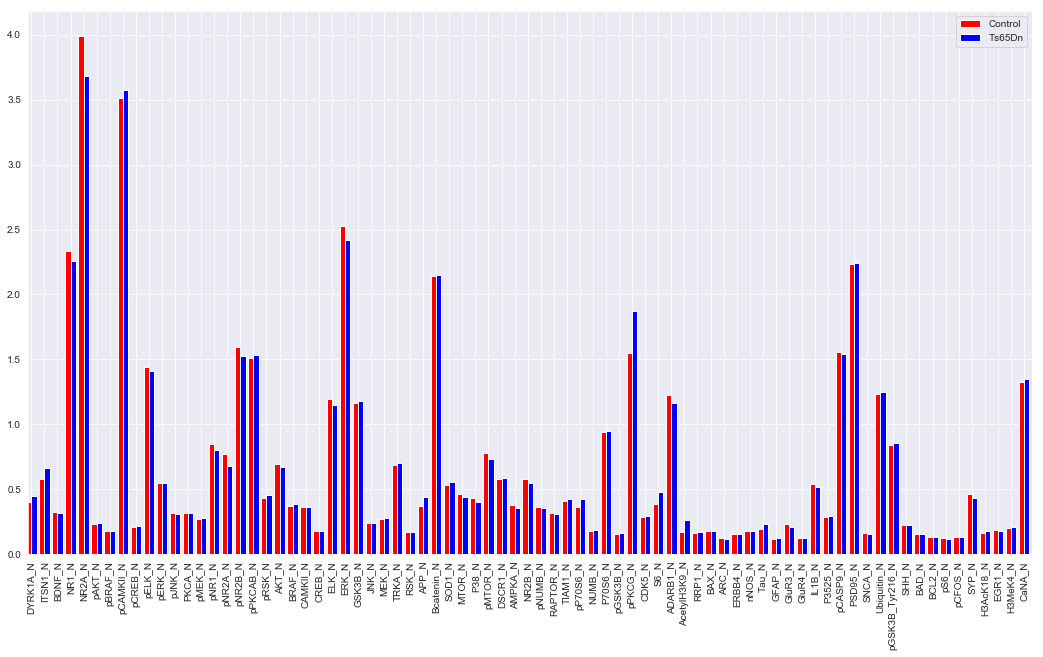

In [22]:
fig, ax = plt.subplots( figsize=(18, 10))

a=df[df["Genotype"]=="Control"].mean().plot(kind="bar",color='red',width=0.4,position=1)
b=df[df["Genotype"]=="Ts65Dn"].mean().plot(kind="bar",color='blue', width=0.4,position=0)

ax.legend(["Control", "Ts65Dn"]);

plt.show()

Com o gráfico de barras tambem não se consegue identificar diferenças entre ratos de controlo e com trissomia

### Agrupar por tratamento para tentar avaliar a diferenca nas leituras da proteína em ratos injectados com memantina e com salina

In [23]:
treatment = df.groupby("Treatment").mean()
treatment

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
Treatment,,,,,,,,,,,,,,,,,,,,,
Memantine,0.423131,0.609568,0.315942,2.275203,3.849453,0.238332,0.186638,3.766228,0.210078,1.426780,...,0.224795,0.157715,0.136933,0.123375,0.131972,0.446758,0.170403,0.186198,0.205791,1.300169
Saline,0.428899,0.625926,0.322627,2.322744,3.838539,0.228302,0.177115,3.285540,0.215581,1.431713,...,0.228928,0.158002,0.132294,0.119469,0.130205,0.445513,0.168954,0.179664,0.205143,1.378544


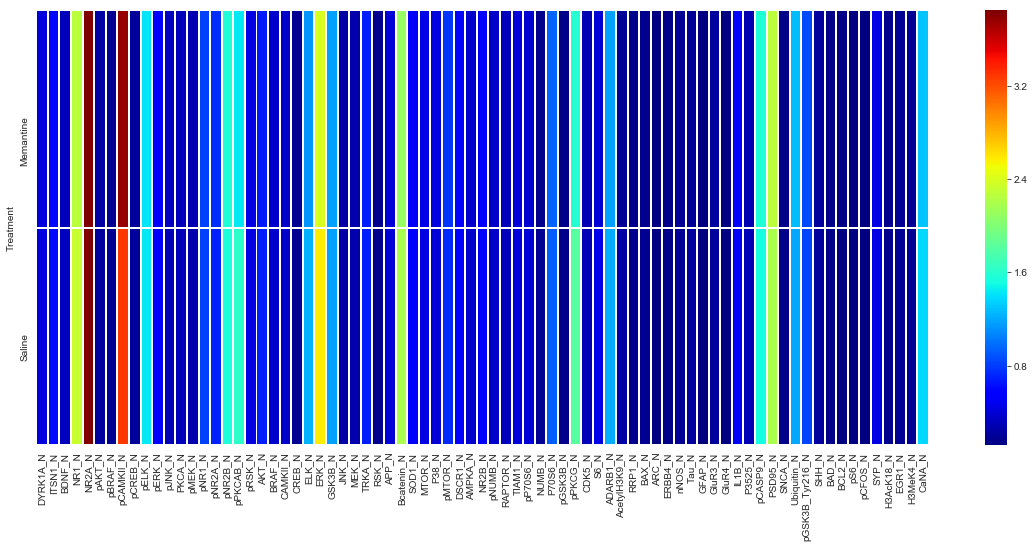

In [24]:
plt.figure(figsize=(20,8))
sns.heatmap(treatment, cmap="jet", linecolor="white", linewidths=1)

Pelo gráfico de calor não se consegue identificar grandes diferenças entre ratos injectados com memantina e com salina, porque as leituras registradas são semelhantes para os dois tipos.    
A proteína pCAMKII parece registar leituras mais elevadas para ratos tratados com memantina.  
A proteína ERK parece registar leituras mais baixas para ratos tratados com memantina.

In [25]:
clas = df.groupby("class").mean()
clas

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
class,,,,,,,,,,,,,,,,,,,,,
c-CS-m,0.480456,0.652587,0.339217,2.381749,4.308540,0.229932,0.182211,2.916187,0.198484,1.492318,...,0.226911,0.157088,0.132984,0.119782,0.125354,0.467403,0.147544,0.176306,0.189381,1.523659
c-CS-s,0.602170,0.778238,0.342920,2.423291,4.296693,0.215575,0.170626,2.948190,0.209002,1.698089,...,0.214282,0.148815,0.128212,0.112368,0.127102,0.445497,0.151179,0.169829,0.183025,1.621806
c-SC-m,0.273203,0.436361,0.290946,2.145633,3.459416,0.241253,0.189547,4.736327,0.208149,1.278566,...,0.224470,0.165653,0.145371,0.128108,0.143614,0.456874,0.182453,0.207078,0.214671,1.009957
c-SC-s,0.274823,0.449354,0.313393,2.404974,3.913096,0.233368,0.184975,3.361288,0.214949,1.327714,...,0.241853,0.156320,0.133456,0.132929,0.135007,0.471512,0.154383,0.198739,0.216080,1.157639
t-CS-m,0.619294,0.797007,0.312732,2.196541,3.565960,0.213621,0.173956,3.121801,0.203395,1.563905,...,0.216934,0.152204,0.132312,0.108196,0.128128,0.413597,0.151769,0.166976,0.186369,1.633341
t-CS-s,0.525735,0.759556,0.305460,2.184606,3.514839,0.214466,0.164795,2.488902,0.210041,1.518302,...,0.222144,0.150884,0.130840,0.111354,0.123268,0.433587,0.158388,0.161740,0.191430,1.552633
t-SC-m,0.329861,0.566783,0.321063,2.379446,4.056223,0.269131,0.201007,4.277257,0.231789,1.381516,...,0.230667,0.155103,0.136565,0.137287,0.130234,0.445738,0.201047,0.193210,0.233581,1.041134
t-SC-s,0.337488,0.549056,0.325586,2.248742,3.565093,0.246759,0.185318,4.176555,0.227165,1.204840,...,0.235643,0.174501,0.136316,0.119205,0.133891,0.428424,0.209899,0.184174,0.226818,1.224570


### Agrupar por classe para tentar avaliar a diferenca nas leituras da proteína em ratos de diferentes classes

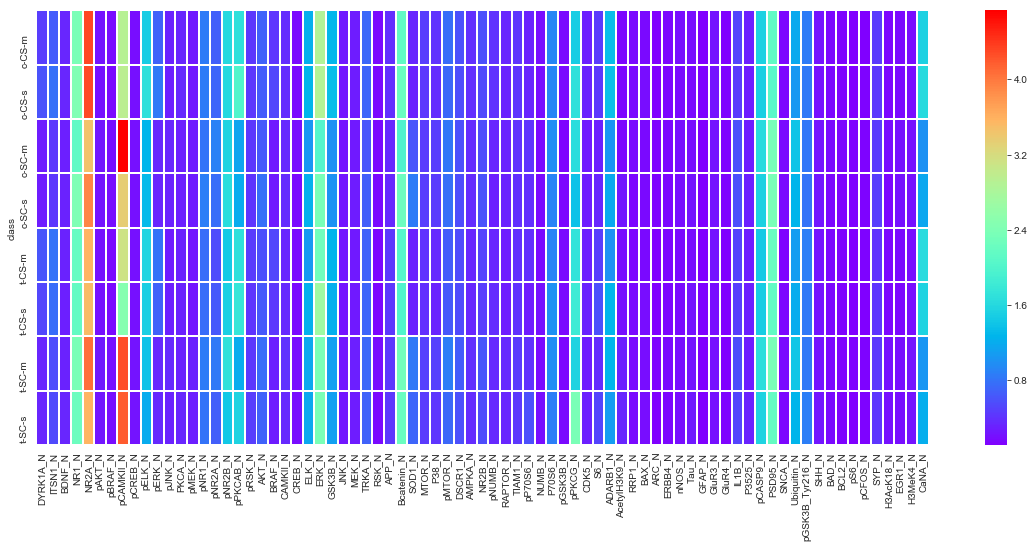

In [26]:
plt.figure(figsize=(20,8))
sns.heatmap(clas, cmap="rainbow", linecolor="white", linewidths=1)

Pelo gráfico de calor não se consegue identificar grandes diferenças nas leituras de proteína nas várias classes de ratos.

# Modelos Supervisionados <a name="supervisionados"></a>

Quando temos um conjunto de dados rotulados em que já sabemos qual é a nossa saída correta e que deve ser semelhante ao conjunto, e existe uma relação entre a entrada de dados e a saída, ou seja:

Temos um conjunto de dados {$x^1$,....,$x^m$}, associados a um conjunto de resultados {$y^1$,....,$y^m$} e queremos construir um classificador que aprenda a prever y com base em x.

Treinar um computador para prever resultados, dando-lhe um conjunto de dados de amostra(treino). O computador aprende a partir dos resultados obtidos para o conjunto de dados de amostra e torna-se capaz de prever futuros conjuntos de dados com base na informação aprendida.


Os modelos de aprendizagem supervisionados dividem-se em modelos de Regressão e Classificação.


##### REGRESSÃO:  
Os modelos de regressão têm a tarefa de aproximar uma função de mapeamento (f) das variáveis de entrada (X) para uma variável de saída contínua (y).  
y = f(X)  
A variável de saída contínua é um valor real, como um número inteiro ou valor de ponto flutuante.
  
Um problema de regressão requer a previsão de uma quantidade.   
Uma regressão pode ter variáveis de entrada valorizadas ou discretas (têm de ser passadas para núméricas no modelo).    
Um problema com múltiplas variáveis de entrada é chamado de um problema de regressão multivariada.  
Um problema de regressão onde as variáveis de entrada são ordenadas pelo tempo é chamado de um problema de previsão de séries temporais.  

Como o modelo de regressão prevê uma quantidade, a habilidade do modelo deve ser medida com o erro nessas previsões.

Existem muitas maneiras de estimar a habilidade de um modelo de regressão, o mais comum é calcular o erro quadrático médio quadrático(RMSE). Um dos beneficios é que as unidades da pontuação de erro estão nas mesmas unidades que o valor previsto.

##### CLASSIFICAÇÃO:      
Os modelos de classificação têm a tarefa de aproximar uma função de mapeamento (f) das variáveis de entrada (X) para variáveis de saída discretas (y). 
A função de mapeamento prevê a classe ou categoria para uma determinada observação.  

As variáveis de saída são chamadas de categorias(ou classes). 

Um problema de classificação exige que os exemplos sejam classificados em uma ou duas classes (cada dado de entrada só pode pertencer no máximo a 2 classes).    
Uma classificação pode ter variáveis de entrada de valor real ou discretas (têm de ser passadas para númericas no modelo).  
Um problema com duas classes geralmente é chamado de problema de classificação de duas classes ou binário.  
Um problema com mais de duas classes geralmente é chamado de problema de classificação multi-classe.  
Um problema em que um exemplo é atribuído a várias classes é chamado de problema de classificação de várias etiquetas.  
É comum que os modelos de classificação prevejam um valor contínuo como a probabilidade de um determinado exemplo pertencente a cada classe de saída. As probabilidades podem ser interpretadas como a probabilidade ou confiança de um dado exemplo pertencente a cada classe. Uma probabilidade prevista pode ser convertida em um valor de classe, selecionando o rótulo de classe que tem a maior probabilidade.  

Por exemplo, um email específico de texto pode ser atribuído às probabilidades de 0.1 como sendo “spam” e 0.9 como sendo “não spam”. Podemos converter essas probabilidadesies para um rótulo de classe, selecionando o rótulo “não spam”, pois tem a maior probabilidade prevista.  

Existem muitas maneiras de estimar a habilidade de um modelo de classificação preditivo, mas talvez o mais comum seja calcular a precisão da classificação.  
A precisão da classificação é a porcentagem de exemplos corretamente classificados de todas as previsões feitas.    

##### REGRESSÃO VS CLASSIFICAÇÃO: 
<img src="fotos/classificacao.png" width="500"/>
Os problemas de modelos de previssão de classificação são diferentes dos problemas de regressão.  
Problemas de regressão são aqueles em que queremos prever um valor real contínuo.  
Problemas de classificação são aqueles em que queremos prever um valor discreto, ou seja classificar um exemplo segundo uma categoria.   
Nos problemas de regressão queremos prever uma resposta enquanto nos problemas de classificação queremos identificar um grupo pertencente.   
A classificação prevê dados não ordenados, enquanto a regressão prevê dados ordenados.
Existe uma certa sobreposição entre os algoritmos de classificação e regressão, por exemplo:    

Um algoritmo de classificação pode prever um valor contínuo, mas o valor contínuo está na forma de uma probabilidade para um rótulo de classe.  
Um algoritmo de regressão pode prever um valor discreto, mas o valor discreto na forma de uma quantidade inteira.  
Alguns algoritmos podem ser usados para classificação e regressão com pequenas modificações, como árvores de decisão e redes neurais artificiais,etc. 

A maneira como avaliamos as previsões de classificação e regressão varia:  
As previsões de classificação podem ser avaliadas com precisão, enquanto que as previsões de regressão não podem.  
As previsões de regressão podem ser avaliadas usando o erro quadrático médio da raiz, enquanto que as previsões de classificação não podem.     

Em alguns casos, é possível converter um problema de regressão para um problema de classificação. Por exemplo, a quantidade a prever pode ser convertida em classes discretas.  

Por exemplo, quantidades em um intervalo contínuo entre 0Euros e 100Euros podem ser convertidas em 2 classes:

Classe 0: 0Euros a 49Euros  
Classe 1: 50Euros a 100Euros  
Isso é chamado de discretização e a variável de saída resultante é uma classificação em que os rótulos possuem uma relação ordenada (chamada ordininal).  

Em alguns casos, um problema de classificação pode ser convertido em um problema de regressão. Por exemplo, um rótulo pode ser convertido em um intervalo contínuo.  

## Modelo Regressão Linear    <a name="regressaoLinear"></a>

O modelo de Regressão Linear é um Modelo Supervisionado de Regressão.  

A regressão Linear estuda a relação entre duas ou mais variáveis, em que uma depende de outra ou outras. Quando se tem uma relação entre uma variavel de entrada e outra de saida tem-se uma Regressão Linear Simples. 
Quando se tem uma relação entre mais do que uma variavel de entrada e uma variavel de saida tem-se uma Regressão Linear Múltipla.    

A Regressão é a descoberta da função que expressa o padrão nos dados, e como é que um valor depende(positiva ou negativamente) de outro ou outros. A sua correlação.

A regressão linear Simples é descrita por uma função de 1º grau (relação entre a variavel independente X1 e variavel dependente Y):  
<img src="fotos/regressao.png" width="100"/>


Regressão Linear Multipla tambem é descrita por um  função de 1º grau (relação entre as variaveis independentes X1 e X2 e a variavel dependente Y):
<img src="fotos/regressao1.png" width="200"/>

A avaliação do modelo de Regresão Linear normalmente é feita através do MAE, MSE e RMAE, onde y são os valores reais e os valores previstos para a variavel de saida.  
O MAE representa a média dos desvios entre os valores reais e previstos. O RMSE representa essa média elevada ao quadrado.  
O RMSE dá um peso maior para desvios grandes (pois são elevados ao quadrado), enquanto o MAE dá um peso igual a todos os desvios.  
O RMSE e o MAE tem a mesma dimensão dos valores observados e preditos. Neste exemplo um RMSE de 0.942 significa que um rato da classe 1 tanto pode ser da classe 0, como da classe 2 ou da classe 1.  
Quanto mais proximo do zero estiver o MAE,MSE e RMSE melhor o modelo.  

##### Mean Absolute Error (MAE): 
<img src="fotos/mae.png" width="200"/>

##### Mean Square Error (MSE): 
<img src="fotos/mse.png" width="200"/>

##### Root Mean Square Error (RMSE):
<img src="fotos/rmse.png" width="300"/>



Multicolinearidade em regressão Linear Multipla e Regressão Logistica: Ocorre quando algumas variáveis de entrada no modelo estão correlacionadas a outras variáveis de entrada.  
A multicolinearidade não afeta a qualidade do ajuste e a qualidade da previsão. Os coeficientes não podem ser interpretados de forma confiável porque variam muito de amostra para amostra, mas os valores previstos não são afetados.    
Para evitar a multicolinearidade pode-se amentar o conjunto de dados(para aumentar a variedade), excluir uma das variaveis de entrada que apresente multicolinearidade.  
 
O índício mais claro da existência da multicolinearidade é quando o R² é bastante alto, mas nenhum dos coeficientes da regressão é estatisticamente significativo.  
Se R² for alto e as correlações parciais são baixas, a multicolinearidade é uma possibilidade. Quando isso acontece uma ou mais variáveis podem ser desnecessárias no modelo. Se R² for alto e as correlações parciais também, a multicolinearidade pode não ser detectável de imediato.  
Na Regressão Linear Simples não existe multicolinearidade porque só há uma variavel de entrada.  

O coeficiente de determinação(R²): Medida de ajustamento de um modelo estatístico linear, como a regressão linear, em relação aos valores observados. O R² varia entre 0 e 1, indicando, em percentagem, o quanto o modelo consegue explicar os valores observados. Quanto maior o R², mais explicativo é o modelo, melhor ele se ajusta à amostra.  

Correlação parcial: correlação entre duas variáveis quaisquer quando o efeito de outras variáveis são mantidos constantes.
  
OS coeficientes são os números pelos quais as variáveis de uma equação são multiplicadas. Por exemplo, na equação y = -3,6 + 5,0X1 - 1,8X2, as variáveis X1 e X2 são multiplicadas por 5,0 e -1,8, respectivamente, por isso os coeficientes são 5,0 e -1,8.  
Em regressão logistica estes coeficientes são estimados pelo Método dos Minimos Quadrados. Procura de encontrar o melhor ajuste para um conjunto de dados tentando minimizar a soma dos quadrados das diferenças entre o valor estimado e os dados observados (tais diferenças são chamadas resíduos).  


### Transformação de variaveis categóricas em quantitativas 

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
enc = LabelEncoder()

In [36]:
# Transformar as variáveis Genotype, Treatment, Behavior e class em numéricas para que o sklearn as compreenda
df["class"] = enc.fit_transform(df['class'])
df["Genotype"] = enc.fit_transform(df['Genotype'])
df["Treatment"] = enc.fit_transform(df['Treatment'])
df["Behavior"] = enc.fit_transform(df['Behavior'])

In [37]:
df.head(1)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.21883,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.13179,0.128186,1.675652,0,0,0,0


In [38]:
df["class"].value_counts()

2    150
0    150
6    135
4    135
3    135
7    132
1    131
5    105
Name: class, dtype: int64

### Divisão Treino-Teste  <a name="divisaoTreinoTeste"></a>

In [39]:
# X - variáveis usadas para modelar o modelo
X = df.drop(["MouseID","class","Genotype","Treatment","Behavior"], axis=1)
X.head(1)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.21883,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.134762,0.106305,0.108336,0.427099,0.114783,0.13179,0.128186,1.675652


In [40]:
# y - variavel que se pretende avaliar
y = df["class"]
y.head(1)

0    0
Name: class, dtype: int32

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Treinar e Ajustar o modelo de Regressão Linear

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
# Treinar o modelo de regressão linear
lm = LinearRegression()

In [45]:
# Ajustar o modelo
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Previsão de dados de teste 

In [46]:
predictions = lm.predict(X_test)

In [47]:
data = pd.DataFrame({"y_test":np.array(y_test), "predictions":predictions})
data.head()

,y_test,predictions
0,5,5.043855
1,0,0.247250
2,2,3.222633
3,0,2.105747
4,2,2.377314


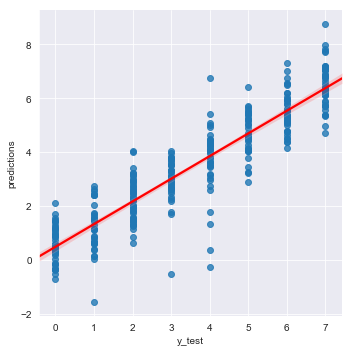

In [48]:
sns.lmplot(x="y_test", y="predictions", data=data, line_kws={'color': 'red'})

Outro modo para visualizar a regressão linear

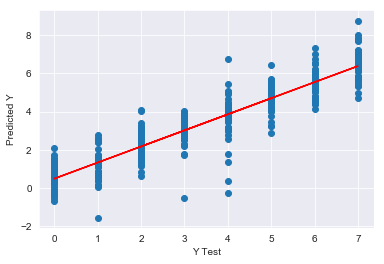

In [49]:
#Não se assemelha-se a uma linha recta (classe prevista = classe real(de teste))
#As classes reais não têm valores negativos, estão entre 0 e 7.
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Linha de regressão linear
m,b = np.polyfit(y_test,predictions, deg=1)
yp = np.polyval([m, b], y_test)
plt.plot(y_test, yp, color="r")


### Avaliação do Modelo

In [50]:
from sklearn import metrics

In [51]:
#RMSE de 1.01 significa que um rato da classe 1 tanto pode ser da classe 0, como da classe 2 ou da classe 1.  

print("MAE", metrics.mean_absolute_error(y_test, predictions))
print("MSE", metrics.mean_squared_error(y_test, predictions))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 0.7231074446081948
MSE 0.8861748125529866
RMSE 0.9413685848555743


### Resíduos

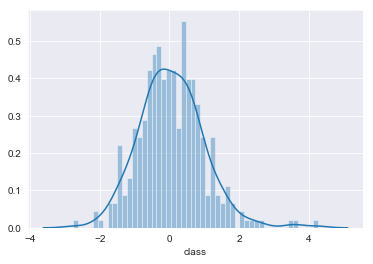

In [52]:
#O histograma parece ser semelhante a  uma distribuição normal, significa que os erros são proximo de zero
sns.distplot(y_test-predictions, bins=50)

## Modelo Regressão Logistica  <a name="regressaoLogistica"></a>

O modelo de Regressão Logitica é um modelo Supervisionado de Classificação.

    
A regressão logistica é usada em vez da regressão linear quando a variavel de saida é categórica e frequantemente binária (sim ou não), mas tambem funciona quando existem mais resultados possiveis (sim, não, talvez). As variaveis independentes tanto podem ser categóricas ou não.    

Regressão Logística Multinominal: Quando existem 3 ou mais resultados possiveis sem ordem.  
Regressão Logística Ordinal: Quando existem 3 ou mais resultados possiveis com ordem.  

Como todas as regressões a regressão logistica faz um analise preditiva. É usada para descrever um conjunto de dados e explicar a relação entre as variaveis de entrada e a variavel de saida, na forma de probabilidade entre 0 e 1.

Na regressão logistica pega-se na saida de dados da função de regressão linear e transforma-se essa informação numa escala de 0 a 1 utilizando a função sigmoid. Se o valor for superior a 0.5 será de uma classe, se for inferior será de outra classe.      
  
No caso da variável dependente Y assumir apenas dois possíveis estados (1 ou 0) e haver um conjunto de p variáveis independentes X1 , X2 , ... , Xp, o modelo de regressão logística pode ser escrito da seguinte forma:  
<img src="fotos/logistica.png" width="300"/>    
Na regressão logistica os parametros da função g(x) são calculados por Máxima verossimilhança. O método de máxima verossimilhança estima os valores dos diferentes parâmetros do modelo estatístico de maneira a maximizar a probabilidade dos dados observados.  
  
Para utilizar o modelo de regressão logística para discriminação de dois grupos, a regra de classificação é a seguinte:  
- se P(Y=1) > 0,5 então classifica-se Y=1   
- se P(Y=1) < 0,5 então classifica-se Y=0    

<img src="fotos/logistica1.png" width="500"/>    




### Divisão Treino-Teste  

In [53]:
X = df.drop(["MouseID","class","Genotype","Treatment","Behavior"], axis=1)
X.head(1)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.21883,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.134762,0.106305,0.108336,0.427099,0.114783,0.13179,0.128186,1.675652


In [54]:
#Na regressão Logistica não é necessário passar a variavel a prever para quantitativa, o sklearn já faz isso.
y = df["class"]
y.head(1)

0    0
Name: class, dtype: int32

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
#São usados 30% dos dados do dataset para fazer o teste do modelo
#São usados 70% dos dados para treinar o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Treinar e Ajaustar o modelo de Regressão Logistica

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
#Treinar o modelo de regressão logistica
logmodel = LogisticRegression(solver='liblinear', multi_class="auto")

In [59]:
#Ajustar o modelo com as entradas de dados de treino às saidas de dados de treino
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

### Previsão e avaliação do modelo

- True positive (TP): Prevê-se que a pessoa é diabética e na realidade é diabética. Previsão correcta.
- True negative (TN): Prevê-se que a pessoa não é diabética e na realidade é saudavel. Previsão correcta.
- False positive (FP): Prevê-se que a pessoa é diabética e na realidade é saudavel. Previsão incorrecta. Cenário mau.
- False negative (FN): Prevê-se que a pessoa não é diabética e na realidade é diabética. Previssão incorrecta. Pior cenário.

<img src="fotos/precisao.png" width="200"/>


Acuracy (Exatidão): Qual a percentagem de pessoas foi correctamente prevista?  
Acuracy: $\frac{True Positive + True Negative}{True Positive + True Negative + False Positive + False Negative}$  
Accuracy é uma boa medida apenas quando o conjunto de dados é simétrico (as contagens de falsos negativos e falsos positivos estão proximas) e se os falsos negativos e falsos positivos tiveram custos semelhantes.
Custo- Neste exemplo, o custo de classificar uma pessoa como FN é muito maior, não está a receber tramamento para o diabetes, do que o custo de classificar como FP, em que há um falso alarme e a pessoa está saudavel, apenas tem precauções adicionais.  


Precisão: Dos que foram previstos como diabeticos, qual a percentagem que na realidade é diabética?  
Qual o grau de certeza acerca dos True Positive?  
Precision = $\frac{True Positive}{True Positive + False Positive}$   
A precisão deve ser escolhida quando o custo dos FP são altos( estar mais confiante acerca dos TP).   
É preferivel ter alguns spam emails no inbox(FN) do que alguns emails normais no spam box(FP). A empresa de email quer ter a certeza absoluta de que o email é spam(TN) antes de o por na spam box.

Recall(Revocação): De todas as pessoas diabéticas, qual a percentagem que foi correctamente prevista?     
Qual o grau de certeza de que não faltam nenhums possitivos?  
Recall = $\frac{True Positive}{True Positive + False Negative}$   
O Recall deve ser escolhido como medida se a ideia de ocorrerem FN é inaceitavel. É preferivel algumas pessoas saudaveis rotuladas de diabéticas do que um pessoa diabética rotulada de saudavel.

F1-Score: Medida que combina precisão e recall é a média harmónica destes.  
F1-Score = $\frac{Precision x Recall}{Precision + Recall}$    
Se o custo de classificar como FP e FN for diferente o F1-Score é a melhor medida. O F1-Score é melhor quando se tem uma destribuição desigual nas classes(Quando o modelo prevê melhor umas classes do que outras).

Se o recall for melhorado a precisão baixa, e o contrário tambem. Quanto mais acertamos (melhor precisão) menos estamos dispostos a errar (aumenta o recall)
Um modelo sem erros teria a precisão igual ao recall e F1-Score e um valor de 1.0.

In [60]:
# Prever os dados de saida para os dados de teste de modo se poder fazer a avaliação do modelo
predictions = logmodel.predict(X_test)

In [2]:
data = pd.DataFrame({"y_test":np.array(y_test), "predictions":predictions})
data.head()

NameError: name 'pd' is not defined

In [62]:
from sklearn.metrics import classification_report

In [63]:
#Relatório de classificação
#Ver como o modelo se ajusta para os dados de teste
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.62      0.69        48
           1       0.61      0.66      0.63        35
           2       0.82      1.00      0.90        37
           3       0.98      0.94      0.96        47
           4       0.70      0.77      0.73        39
           5       0.85      0.88      0.86        25
           6       1.00      0.83      0.91        52
           7       0.91      1.00      0.95        39

   micro avg       0.83      0.83      0.83       322
   macro avg       0.83      0.84      0.83       322
weighted avg       0.84      0.83      0.83       322



In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
confusion = confusion_matrix(y_test,predictions)

In [66]:
outside_columns = ["","","","Predicted","","","",""]
outside_index = ["","","","Actual","","","",""]
inside = ["c-CS-m","c-CS-s","c-SC-m","c-SC-s","t-CS-m","t-CS-s","t-SC-m","t-SC-s"]

hier_columns = list(zip(outside_columns, inside))
hier_columns = pd.MultiIndex.from_tuples(hier_columns)

hier_index = list(zip(outside_index, inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

pd.DataFrame(confusion, columns=hier_columns, index = hier_index)

Predicted                            
              c-CS-m c-CS-s c-SC-m    c-SC-s t-CS-m t-CS-s t-SC-m t-SC-s
       c-CS-m     30      8      0         0      9      0      0      1
       c-CS-s      7     23      0         0      2      3      0      0
       c-SC-m      0      0     37         0      0      0      0      0
Actual c-SC-s      1      0      0        44      0      0      0      2
       t-CS-m      0      7      0         0     30      1      0      1
       t-CS-s      1      0      0         0      2     22      0      0
       t-SC-m      0      0      8         1      0      0     43      0
       t-SC-s      0      0      0         0      0      0      0     39



OS TP, TN, FP e FN são definidos para problemas de classificação binários, em que o resultado pode ser definido como verdadeiro ou falso.   
Para usar esta terminologia para problemas com mais classes, tem que se dividir a matriz de confusão em sub-tabelas com a classificação para cada classe.  
Pode-se calcular os TP, TN, FP, and FN para a classe A, da seguinte forma:

TP: True A's that are correctly classified as A  
TN: All other classes correctly classified as not A  
FP: Other classes incorrectly classified as A  
FN: A's that were incorrectly classified as not A  

Isso depois deve ser repetido para todas as outras classes.

c-CS-m  
TP = 31  
TN = 26+7+47+2+32+3+5+36+1+2+3+31+31  
FP = 8+1  
FN = 9+5+1+2  

Precision = 31/(31+9) = 0.78  
Recall = 31/(31+17) = 0.65  

c-CS-s   
TP = 26   
TN = 31+5+1+2+47+1+2+32+3+36+1+2+3+31+31+31  
FP = 9+5  
FN = 8+7  

Precision = 26/(26+14) = 0.65    
Recall = 26/(26+15) = 0.63    

### Avaliar Overfitting e Underfitting

In [67]:
# Fazer as previsões para o modelo de treino (dados com os quais o modelo foi treinado)
predictions = logmodel.predict(X_train)

In [68]:
data = pd.DataFrame({"y_test":np.array(y_train), "predictions":predictions})
data.head()

,y_test,predictions
0,0,0
1,0,0
2,3,3
3,7,7
4,0,0


In [69]:
# Ver como o modelo se ajusta para os dados de treino
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       102
           1       0.78      0.78      0.78        96
           2       0.89      1.00      0.94       113
           3       1.00      0.89      0.94        88
           4       0.80      0.92      0.85        96
           5       0.95      0.94      0.94        80
           6       1.00      0.83      0.91        83
           7       0.89      1.00      0.94        93

   micro avg       0.89      0.89      0.89       751
   macro avg       0.90      0.89      0.89       751
weighted avg       0.89      0.89      0.89       751



Para os dados de treino o modelo teve uma precisão de 0.88 e para os dados de teste de 0.82. O modelo não esta sobreajustado, porque a precisão para novos dados(de teste) não é muito menor.  

Para ver um exemplo de sobreajustamento, aumentar test_size na divisão de dados. Assim os dados de treino diminuem e a probabilidade de haver exemplos novos, nos dados de teste aumenta.
  
  
  
     

Overfitting(sobreajuste ou superajuste) e Underfitting(sub-ajuste) são classificações de ajuste do modelo.  

O modelo faz o subajuste dos dados de treino quando tem um desempenho insatisfatório para estes dados. Isto acontece porque o modelo não consegue capturar o relacionamento entre os exemplos de entrada (X) e os dados de saida (y). Quando ainda existe espaço para melhorar o modelo.

O modelo faz o sobreajuste dos dados de treino quando tem muito bom desemprenho para os dados de treino mas não nos dados de teste. Isto acontece porque o modelo decorou o conjunto de dados com que foi treinado e não consegue extrapolar as conclusões obtidas para exemplos não vistos.

Na primeira figura, um viês alto, pontos muito afastados da função do modelo de treino.  
Na segunda figura, o viês e a variância são baixos em relação a função do modelo de treino.  
Na terceira figura, uma variância alta, pontos muito proximos da função do modelo de treino mas com grande variabilidade.    
<img src="fotos/overfitting.png" />


##### Como avaliar o sobreajuste:
- Usar o Cross-Validation (Método holdout): Dividir os dados em dados de treino e dados de teste. Os dados de teste fazem uma estimativa do comportamento do modelo para exemplos(dados) não vistos.
- Usar varias vezes o Cross-Validation (cross-validation k-fold): Dividir o conjunto total de dados em k subconjuntos do mesmo tamanho. Um subconjunto é utilizado para teste e os k-1 restantes são utilizados para estimação dos parâmetros e calcula-se a precisão do modelo. Este processo é realizado k vezes alternando de forma circular o subconjunto de teste.  
- Se houver muitos dados disponiveis, dividir em treino, teste e validação. Se o modelo tiver uma precisão de 0.90 para os dados de teste e de 0.50 para os dados de validação o modelo está sobreajustado.  

##### Como evitar o sobreajuste:
- Simplificar o modelo (avaliar se algum parâmetro pode ser retirado). 
- O número de parâmetros do modelo deve ser muito menor do que o tamanho do dataset(número de dados).   
Na figura acima temos sobreajuste quando o número de parâmetros($\theta$) da função é demasiado grande para o conjunto de dados e existe subajuste quando o número de parametros é reduzido para o conjunto de dados.  
- Aumentar o conjunto de dados (maior variedade)
- Utilizar um modelo que faça sentido para aqueles dados (não tentar encaixar dados que se relacionam linearmente num modelo não-linear)  
- Regularização: Desencoraja a complexidade do modelo penalizando a função custo.

<table><tr>
<td> <img src="fotos/of.png" alt="Drawing" style="width: 300px;height: 100px;"/> </td>
<td> <img src="fotos/of1.png" alt="Drawing" style="width: 300px;height: 100px;"/> </td> 
</tr></table>

Sendo a função de custo a soma dos quadrados da diferenca entre o valor actual e o previsto. Acima está a função de custo para uma regressão linear com 4 variaveis de entrada.  
À medida qua aumentam as variaveis de entrada a complexidade do modelo aumenta e  tenta ajustar-se a todos os pontos.  
Quando se penaliza os pesos(variaveis) θ_3 e θ_4 e se tornam demasiado pequenos, perto de zero, tornam-se esses pesos 
negligenciáveis e ajuda a simplificar a função(modelo).  

<table><tr>
<td> <img src="fotos/of2.png" alt="Drawing" style="width: 300px;height: 150px;"/> </td>
<td> <img src="fotos/of3.png" alt="Drawing" style="width: 300px;height: 150px;"/> </td>   
</tr></table>

A regularização funciona com base no principio de que pesos mais pequenos geram modelos mais simples e ajuda a evitar o overfitting.  
De modo a que o impacto das variaveis no modelo seja tido em conta, são penalizados todos os pesos tornando-os pequenos.

<table><tr>
<td> <img src="fotos/of4.png" alt="Drawing" style="width: 300px;height: 150px;"/> </td>
<td> <img src="fotos/of5.png" alt="Drawing" style="width: 300px;height: 150px;"/> </td>   
</tr></table>

Na imagem da direita acima adicionou-se o termo de regularização à função custo. Isto ajuda a simplificar o modelo e evitar o overfitting.  

λ é o termo de de panalização ou regularização que determina o quanto penalizar os pesos(variaveis).  
Quando λ é zero a regularização é zero e tem-se a função custo original(imagem acima da esquerda).    
Quando λ é grande, penalizam-se os pesos e eles aproximam-se de zero. Resulta num modelo muito simples com grande viês e possivelmente underfitting(imagem acima da direita).     
O valor optimo de λ estará entre 0 e um grande valor e fará que o erro de generalização seja pequeno, ou seja o modelo generalize bem.  

Regularização L1 ou Lasso or L1 norm:
<table><tr>
<td> <img src="fotos/of6.png" alt="Drawing" style="width: 300px;height: 100px;"/> </td>   
</tr></table>
Este tipo de regularização faz selecção de pesos(variaveis) atribuindo um valor de zero a pesos(variaveis) insignificantes e um valor diferente de zero a pesos uteis.  
Funciona bem quando exitem outliers, não consegue interpretar padrões complexos, tem multiplas soluções, penaliza a soma dos valores absolutos dos pesos.
No L1 norm os pesos(variaveis ou parametros) são espremidos até zero. Quando os valores dos pesos são perto do zero leva a sparse L1 norm. Na solução sparse a maioria dos pesos(variaveis) são zero e poucas variaveis têm peso diferente de zero.   

Regularização L2 ou Regularização Ridge:
<table><tr>
<td> <img src="fotos/of7.png" alt="Drawing" style="width: 300px;height: 100px;"/> </td>   
</tr></table>
A regularização L2 penaliza a soma dos quadrados dos pesos. Só tem uma solução e não tem solução sparce.     
Não faz selecção de parametros(variaveis), é sensivel a outliers e consegue interpretar padrões complexos.      
Faz melhores previsões quando a variavel de saida é função de todas as variaveis de entrada.    



###### Como avaliar o subajuste:
- Fazer a previsão para o conjunto de dados de treino(dados com os quais o modelo foi treinado). Se a precisão for baixa, o modelo é subajustado.

##### Como evitar o subajuste:
- Aumentar a complexidade do modelo  
Na figura acima temos subajuste quando o número de parametros é reduzido para o conjunto de dados. 

## K Nearest Neighbors (KNNs)    <a name="knn"></a>

O modelo de KNN é um modelo Supervisionado que pode ser utilizado como de Classificação e Regressão(Neste exemplo utilizou-se para classificação).  

No algoritmo Knn tem-se o dado não classificado (vermelho) dos dados de teste e os outros dados já classificados (amarelo e rouxo) dos dados de treino. Calcula-se a distancia do dado não classificado com os outros para saber quais têm a menor distancia. Pega-se num numero K desses dados mais proximos e verifica-se qual é a classe que mais aparece.   
Na imagem abaixo o dado não classificado seria da classe roxa para um k=3 e seria da classe amarela para um k=6.  
<img src="fotos/knn.png" width="200"/>  
Para calcular a distancia entre o ponto não classificado e o classificado mais proximo, normalmente utiliza-se a distancia euclidiana. Quanto menor essa distancia, mais similares são os dados.   
<img src="fotos/knn1.png" width="400"/>   
Calcula-se a distancia, do ponto não classificado até ao ponto classificado, para todos os dados classificados.  
Quando se tiver a distancia euclidiana entre o ponto não classificado e todos os pontos classificados, ordena-se da menor para a maior.  
Verifica-se quais são as k menores distancias (por exemplo as 4 menores distancias).    
Verifica-se qual a classe que mais aparece nessas k vezes (por exemplo 3 vezes a classe azul).   
Atribui-se ao ponto não classificado a classe que aparecer mais vezes.  
Se o algoritmo for utilizado para regressão atribui-se ao ponto não classificado a média dos k pontos classificados.

##### Melhor valor para K:  
Ao diminuir o valor de k, as previsões ficam menos estáveis. Por exemplo, pode-se ter um ponto não classificado rodeado de muitos pontos classificados como vermelhos e um unico ponto verde, que está mais proximo. O ponto não classificado deveria ser considerado como vermelho, mas como k=1 será classificado como verde.

Ao aumentar o valor de k, as previsões ficam mais estaveis e precisas devido ao aumento de pontos classificados para comparação. Isto até determinado valor de k, a partir do qual começa a aumentar o erro na previsão. 

Se k=1, o ponto a classificar é classificado como o mais proximo do conjunto de treino(baixo viês), mas o modelo fica mais dependente dos dados de treino(alta variancia), porque classificaram-se todos os pontos como os mais semelhantes ao conjunto de treino.  
K=1 na grande maioria dos casos implica Overfitting(para tal não acontecer as classes da variavel dependente têm de estar claramente separadas).

Se k=numero de dados de treino, tudos os pontos a classificar serão classificados como a classe maioritaria para esses conjunto de dados(variancia zero). Mas o viês será alto, porque a classificação estará frequentemente distante da real.

Num problema de classificação, quando se está à procura de uma classe para o dado não classificado normalmente utiliza-se um k impar para haver um desempate nessa classificação. 

Para k=1, se for escolhido para treino o conjunto de dados de treino, o erro será zero. Porque o ponto mais proximo será ele próprio.

Quanto maior for a separação entre as classes da variavel dependente, melhor funciona o algoritmo Knn.

##### Vantagens:  
- Algorimo simples de implementar  
- Não e necessário montar um modelo, acertar parâmetros   
- Pode ser utilizado para classificação e regressão   
  
##### Desvantagens:
- Torna-se significativamente mais lento à medida que aumentam as variaveis independentes(aumentam as distancias a comparar) e o valor de k.  


### Normalização das variáveis

O objectivo da normalização é mudar o valor das colunas númericas do conjunto de dados para uma escala comum a todas as variaveis independentes, sem destorcer as diferencas nos intervalos de valores.  
Nem todos os conjunto de dados necessitam de normalização, só quando as variaveis independentes têm diferentes intervalos de valor.  

Por exemplo, um conjunto de dados contendo, a idade e o salário. A idade varia de 0-100 e o salário de 0-20.000. O salário é cerca de 1000 vezes maior. As duas variaveis estão em diferentes intervalos de valores. Se for utilizada a regressão linear, a variavel salário irá influenciar muito mais o modelo devido aos seus valores mais altos. Mas isso não significaria necessáriamente que era uma variavel mais importante para fazer a previsão.  

Como o classificador KNN prevê a classe de um ponto ao identificar os pontos mais próximas, a escala da variável é importante. Todas as variáveis que estão em grande escala terão um efeito muito maior na distância entre os pontos e, portanto, sobre o modelo KNN, do que as variáveis em pequena escala.

Neste caso o modelo KNN for feito sem antes normalizar as variaveis nota-se que a precisão diminui um pouco apesar de todas as variaveis estarem na mesma escala.  

A normalização pode ser feita segundo a amplitude(foi a utilizada neste exemplo) ou distribucional.  
A normalização segundo a amplitude pode ser utilizada quando existem unidades diferentes ou dispersões muito heterogêneas.  
A normalização distrubucional normalmente é utilizada para remover distorções de valores aberrantes e obtenção de simetria.  

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(df.drop(["MouseID","class","Genotype","Treatment","Behavior"], axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
df_normalizado = scaler.transform(df.drop(["MouseID","class","Genotype","Treatment","Behavior"], axis=1))

In [17]:
df_param = pd.DataFrame(df_normalizado, columns=df.columns[1:-4])

In [18]:
df_param.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.311613,0.515772,2.246935,1.492238,2.296529,-0.362630,-0.174765,-0.900934,0.600360,0.688467,...,-1.305096,-1.327878,0.000146,-1.064798,-0.989850,-0.286436,-1.011032,-1.412393,-1.604569,1.065853
1,0.355559,0.285067,1.874704,1.415117,1.969985,-0.538891,-0.354839,-0.963918,0.439216,0.357844,...,-0.907102,-1.553101,0.000146,-1.044747,-1.164336,-0.068966,-1.062738,-1.321261,-1.543687,1.279680
2,0.333796,0.448515,2.006940,1.120854,1.902583,-0.603213,-0.244667,-0.970721,0.539698,0.282845,...,-1.138591,-1.484211,0.000146,-0.925197,-1.081709,-0.156128,-1.064405,-1.369156,-1.620231,1.854913
3,0.065166,-0.000636,0.799893,0.487380,1.214897,-0.263256,-0.216589,-1.071869,-0.173487,0.355083,...,-1.192773,-0.945739,0.000146,-1.282911,-0.862858,-0.818143,-0.723549,-0.981779,-1.216089,1.144236
4,0.036466,0.000768,0.803450,0.196426,0.935753,-0.502878,-0.324124,-1.085985,-0.629036,0.160729,...,-0.727928,-1.052396,0.000146,-1.171110,-0.887511,-0.180501,-0.942976,-1.177908,-1.185393,1.582123


### Divisão Treino-Teste  

In [19]:
X = df_param

In [20]:
#No KNN não é necessário passar a variavel a prever para quantitativa, o sklearn já faz isso.
y = df["class"]
y.head(1)

0    c-CS-m
Name: class, dtype: object

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#São usados 30% dos dados do dataset para fazer o teste do modelo
#São usados 70% dos dados para treinar o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Treinar e Ajaustar o modelo de KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
#Treinar o modelo de KNN com n=1
knn = KNeighborsClassifier(n_neighbors=3)

In [25]:
#Ajustar o modelo com as entradas de dados de treino às saidas de dados de treino
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

### Previsão e avaliação do modelo

In [26]:
# Prever os dados de saida para os dados de teste de modo se poder fazer a avaliação do modelo
predictions = knn.predict(X_test)

In [27]:
data = pd.DataFrame({"y_test":np.array(y_test), "predictions":predictions})
data.head()

,y_test,predictions
0,c-SC-m,c-SC-m
1,t-CS-s,t-CS-s
2,t-SC-s,t-SC-s
3,c-SC-m,c-SC-m
4,t-CS-s,t-CS-s


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
#Relatório de classificação
#Ver como o modelo se ajusta para os dados de teste
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      c-CS-m       0.93      1.00      0.96        40
      c-CS-s       1.00      0.89      0.94        38
      c-SC-m       1.00      1.00      1.00        47
      c-SC-s       0.95      1.00      0.97        37
      t-CS-m       1.00      1.00      1.00        38
      t-CS-s       0.97      1.00      0.98        31
      t-SC-m       1.00      0.96      0.98        48
      t-SC-s       1.00      1.00      1.00        43

   micro avg       0.98      0.98      0.98       322
   macro avg       0.98      0.98      0.98       322
weighted avg       0.98      0.98      0.98       322



In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion = confusion_matrix(y_test,predictions)

In [32]:
#Matriz de confusão
outside_columns = ["","","","Predicted","","","",""]
outside_index = ["","","","Actual","","","",""]
inside_columns = ["TP","FP"]
inside_rows = 

hier_columns = list(zip(outside_columns, inside_columns))
hier_columns = pd.MultiIndex.from_tuples(hier_columns)

hier_index = list(zip(outside_index, inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

pd.DataFrame(confusion, columns=hier_columns, index = hier_index)

Predicted                            
              c-CS-m c-CS-s c-SC-m    c-SC-s t-CS-m t-CS-s t-SC-m t-SC-s
       c-CS-m     40      0      0         0      0      0      0      0
       c-CS-s      3     34      0         0      0      1      0      0
       c-SC-m      0      0     47         0      0      0      0      0
Actual c-SC-s      0      0      0        37      0      0      0      0
       t-CS-m      0      0      0         0     38      0      0      0
       t-CS-s      0      0      0         0      0     31      0      0
       t-SC-m      0      0      0         2      0      0     46      0
       t-SC-s      0      0      0         0      0      0      0     43

### Escolher um valor K

Usar o método do cotovelo para escolher um bom Valor K:

In [33]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

Text(0, 0.5, 'Error Rate')

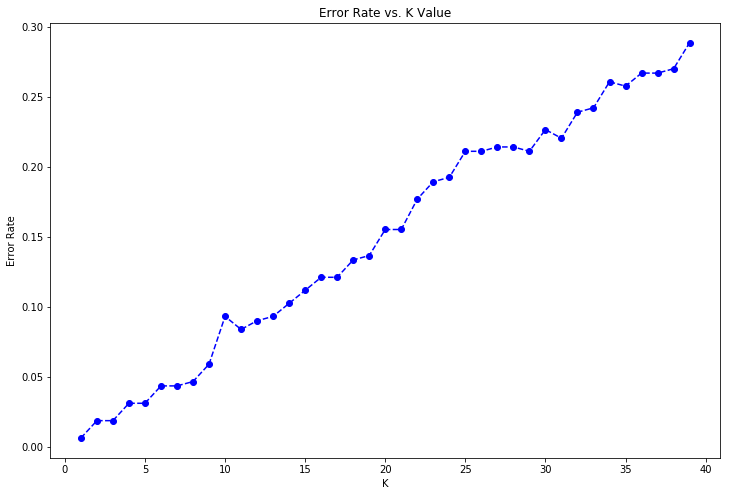

In [34]:
plt.figure(figsize=(12, 8))
plt.plot(range(1,40), error_rate,  color="blue", linestyle="dashed", marker="o")

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

K=1 
A menor taxa de erro é para K=1. porque apenas compara com a classe mais proxima do modelo de treino. Há medida que se compara com mais pontos vai-se comparar o ponto a classificar com as 8 classes e o erro aumenta, porque os pontos de classes diferentes estão muito proximos.

k=1 está-se a assumir que o conjunto de treino é semelhante ao conjunto de teste. Os pontos do conjunto de teste
são classificados como o ponto mais proximo do conjunto de treino.
O modelo está altamente dependente do conjunto de treino, existe overfitting, porque à medida que o modelo se afasta do modelo de traino(com o aumento de k), aumentam os erros.  

### Avaliar Overfitting e Underfitting

In [35]:
from sklearn.model_selection import cross_validate

scoring = ['precision_weighted', 'recall_weighted', 'f1_weighted']

scores = cross_validate(knn, X, y, cv=3, scoring=scoring, return_train_score=True )
scores

{'fit_time': array([0.00600338, 0.        , 0.        ]),
 'score_time': array([0.21014762, 0.17391634, 0.1787653 ]),
 'test_precision_weighted': array([0.36721192, 0.53294729, 0.27511177]),
 'train_precision_weighted': array([0.86013224, 0.87170659, 0.83863483]),
 'test_recall_weighted': array([0.37988827, 0.47206704, 0.28011204]),
 'train_recall_weighted': array([0.85034965, 0.86013986, 0.80586592]),
 'test_f1_weighted': array([0.35711651, 0.44212869, 0.23696121]),
 'train_f1_weighted': array([0.85048349, 0.85738592, 0.78998775])}

In [36]:
# Fazer o Cross Validation para avaliar o Overfitting
# Ao utilizar o cv com um numero inteiro está-se a utilizar-se o KFold ou o StratifiedKFold por defeito. Está-se a dividir o 
#dataset, a ajustar o modelo e a computar o resultado k vezes com divisões as diferentes k divisões em todas as vezes.

#O ShuffleSplit divide aleatoriamente os dados em treino e teste a cada iteração.
#O KFold divide os dados em k subconjuntos

from sklearn.model_selection import cross_validate, ShuffleSplit

cv = ShuffleSplit(n_splits=3, test_size=0.30)
scoring = ['precision_weighted', 'recall_weighted', 'f1_weighted']

scores = cross_validate(knn, X, y, cv=cv, scoring=scoring, return_train_score=False )
scores

{'fit_time': array([0.00800586, 0.01562929, 0.        ]),
 'score_time': array([0.16077089, 0.1498735 , 0.15625072]),
 'test_precision_weighted': array([0.75218711, 0.80342282, 0.77412347]),
 'test_recall_weighted': array([0.68012422, 0.76086957, 0.70807453]),
 'test_f1_weighted': array([0.65497107, 0.75347096, 0.70232396])}

## Decision Trees e Random Forests    <a name="trees"></a>

#### Arvores de Decisão
O algoritmo Arvore de Decisão é um modelo Supervisionado não-paramétrico(como todos os outros algoritmos não assume nada sobre os dados na construção do modelo) que pode ser utilizado como de Classificação e Regressão(Neste exemplo utilizou-se para classificação).     
No modelo da árvore de decisão faz-se diversas divisões dos dados em subconjuntos, de forma que os subconjuntos vão ficando cada vez mais puros. Um subconjunto dos dados será mais puro quando contém menos classes(ou apenas uma) da variável de saida.   

  
Se usada para classificação avalia a probabilidade de um ponto pertencer a uma classe ou classifica esse ponto como pertencendo à classe com caracteristicas mais semelhante.    
Se usada para regressão retorna um valor continuo.    

<img src="fotos/tree7.png" width="500"/>  

Uma forma de trabalhar matematicamente com pureza é por meio da análise da entropia e do ganho de informação.

A entropia é uma forma de medir a pureza de cada subconjunto de uma árvore de decisão.  
No caso de um conjunto de dados em que a variavel de saida é binária (sim ou não), a entropia é uma forma de medir a probabilidade de obter a ocorrência do evento a partir de uma seleção aleatória do subconjunto de dados.   
A entropia varia entre 0 e 1. Se ela for zero, então não há supresa nas respostas possíveis. É 1 quando a probabilidade de ocorrencia é 50%-50%.  
  
O ganho informacional está relacionado com a entropia. O ganho de informação ocorre quando uma nova subdivisão dos dados provoca uma redução na entropia (quanto maior o ganho informacional menor é a entropia).    
O ganho informacional é baseado na redução da entropia depois de uma divisão do conjunto de dados.  

Construir uma árvore de decisão trata-se de encontrar regras sobre as variáveis do modelo (ou pontos de corte) que retornem o maior ganho de informação, isto é, que tornam os ramos da árvore mais homogêneos, com menor entropia.  

<img src="fotos/tree6.jpg" width="300"/>  

As arvores de decisão têm um estrutura “if … then … else …”, que se ajustam facilmente num estrutura de programação.O seu uso é apropriado para problemas de categorização quando os atributos de um dado são constantemente avalidaos para determinar a sua categoria.

<img src="fotos/tree8.jpg" width="500"/>  

No proximo exemplo cada uma das cores representa uma espécie da flor de íriss: setosa (amarela), versicolor (verde) e viriginica (roxa)
<img src="fotos/tree1.png" width="300"/>  

Quer-se construir uma árvore de decisão para determinar a qual espécie uma nova flor de íris pertence dada suas características (comprimento e largura da pétala).   
- Divide-se o espaço recursivamente, fazendo cortes ortogonais, levando em consideração uma variável por vez, que maximiza a pureza das sub-regiões resultantes (pureza = homogeneidade no que diz respeito às espécies/rótulos).   
  
Cada divisão do espaço é representada por um nó na árvore de decisão. A primeira divisão (nós raiz da árvore) leva em consideração todos os exemplos (pontos) do espaço ao encontrar o ponto de corte que maximiza a pureza, de acordo com algum critério de impureza, das sub-regiões resultantes.   
Supondo que o comprimento da pétala de valor 2,45 cm é o ponto de corte que melhor divide o espaço. Portanto, essa será o nó raiz de nossa árvore de decisão.  
<img src="fotos/tree2.png" width="500"/>  

Com esse corte resultou uma região totalmente pura (conseguiu-se separa as setosas do restante) e uma outra heterogênea.  
- recursivamente dividir as duas sub-regiões do espaço (da esquerda e da direita). Na esquerda, como se tem uma região completamente pura e isso significa que qualquer corte que se faça nessa região terá como resultados regiões puras. Portanto, pode-se parar a divisão, ou seja, essa região será considerada um nó folha na árvore.    

A região da direita não é pura, assim deve-se continuar a divisão dessa região até se obter sub-regiões puras.
<img src="fotos/tree3.png" width="600"/>  

A divisão na sub-região da direita, foi feita no eixo da largura da pétala no valor 1,75 cm. Resultou em mais duas novas sub-regiões disjuntas, que, não estão completamente puras.   
- Este processo é repetido recursivamente até que um critério de parada seja alcançado (profundidade, número de folhas) ou que todas as folhas sejam puras, que implica na costrução até sua profundidade máxima .    

Na figura a seguir vê-se como ficaria a árvore e as partições (quase) puras do espaço.
<img src="fotos/tree4.png" width="700"/>  

###### Escolher o  "melhor" ponto de corte:  
Quer-se encontrar a melhor divisão em termos de alguma medida de impureza, como Entropia ou taxa de erro.   
Encontrar o ponto de corte que leva a árvore de decisão ótima pode ser computacionalmente inviável (construir a árvore de decisão binária ótima é um problema np-completo). Portanto, fazem-se escolhas locais ótimas (não garantindo o ótimo global).    Para encontrar melhor ponto de corte, tem-se de testar todos os possíveis, ou seja, para cada atributo e valores possíveis calcular o ganho de informação (quão pura a divisão torna o espaço) para cada um dos pontos de corte candidatos. Após essa etapa, escolhe-se o candidato com maior ganho de informação para ser o ponto de corte do nó em questão.   

Calcular o ganho de informação:  
O ganho de informação representa a informação aprendida sobre os rótulos quando se divide uma região do espaço em duas sub-regiões de acordo com ponto de corte. É definida pela fórmula:  

InfoGain(R, R_e, R_d) = H(R) - (|R_e|*H(R_e) + |R_d|*H(R_d)) / |R|,  
onde H é a impureza da região, R é a região atual, R_e é sub-região da esquerda, R_d é sub-região da direita e |.| é quantidade de exemplos na dada região.  

Os critérios de impureza mais comuns para classificação são a Entropia e o índice Gini:  
entropia(R) = -∑ p(c|R) log (p(c|R)) ,  
gini(R) = ∑ p(c|R) (1 - p(c|R)),
onde p(c|R) é a probabilidade de um ponto da região R pertencer a classe c. Essa probabilidade é estimada pela razão entre quantidade de pontos da classe c e o total de pontos em R.    
<img src="fotos/tree5.png" width="700"/>     
  
Como se tem 50 exemplos de cada espécie, a p(c|R) para todas as espécies é 50 / 150 ~ 0.33.    
Calculando para a sub-região da esquerda:     
p(c = setosa | R_e) = 1.0 (só temos setosa nessa região)     
p(c = versicolor | R_e) = p(c = virginica | R_e) = 0.0.     
Para a sub-região da direita:    
p(c = setosa | R_d) = 0.0     
p(c = versicolor | R_d) = p(c = virginica | R_d) = 0.5.      

Com esses valores, calcula-se a entropia de cada região:    
entropia(R) = -∑ p(c|R) log (p(c|R)) =- 3 * (0.33 log(0.33)) ~0.48    
entropia(R_e) =-(1.0 log(1.0) + 0.0 log(0.0) + 0.0 log(0.0)*) = 0    
entropia(R_d) =-(0.0 log(0.0) + 0.5 log(0.5) + 0.5 log(0.5)*) ~0.30    
  
Portanto, o ganho de informação usando entropia como critério de impureza é:  
InfoGain = 0.48 - (50*0 + 100*0.30) / 150 = 0.28 


Para se obter arvores mais aleatórias pode-se utilizar limiares (thresholds) aleatórios para cada característica, ao invés de procurar pelo melhor limiar (como se fez acima).  

###### Vantagens das arvores de decisão:
- Facil interpretação e modelo facil explicação, porque são facilmente visualizadas    
- Requerem pouca preparação de dados, métodos baseados em árvores normalmente não requerem normalização dos dados. 
- Conseguem lidar com valores em falta, categóricos e numéricos(podem ser aplicadas a problemas classificaçao e de regressão, apesar de os modelos de regressão seram mais indicados).    
- São capazes de lidar com problemas com variaveis de saida com múltiplos rótulos.   
- É uma das maneiras mais rápidas para encontrar as variaveis mais importantes para o modelo e as relações entre as variaveis.  

##### Desvantagens das arvores de decisão:  
- Uma árvore crescida até sua profundidade máxima pode decorar o conjunto de treino (Overfitting). Pode ser evitado usando todos os dados, "podando" a árvore de decisão:  
Atribuir uma profundidade máxima ou quantidade máxima de folhas, eliminar folhas até que o erro no treino seja semelhante ao erro no teste, eliminar ramos desnecessários.  
- São modelos instáveis (alta variância), pequena variações nos dados de treino podem resultar em árvores completamente diferentes. Isso pode ser evitado ao treinar-se várias árvores distintas e juntar suas previsões(criar uma floresta aleatória).   
- O algoritmo de construção da árvore de decisão é goloso, não garante a construção da melhor estrutura para os dados de treino em questão. Esse problema também pode ser evitado ao treinar-se várias árvores distintas e agrupar suas previsões(criar uma floresta aleatoria).     
É guloso porque o algoritmo executa sempre o melhor passo avaliado localmente, sem se preocupar se este passo, junto à sequência completa de passos, vai produzir a melhor solução ao final.  
- Ao trabalhar com variaveis numericas continuas, perde informação quando as classifica em diferentes categorias. Funciona melhor quando as variaveis são numéricas.   
- Se houver alguma classe dominante a arvore de decisão resultante pode apresentar um resultado enviesado(tem-se de subdividir bem o conjunto de dados para todas as classes estarem igualmente representadas no conjunto de treino).
- Quando se tem variaveis de entrada categoricas e o o numero de categorias da variavel de saida é grande a resposta pode ser enviesada.    
- Os calculos podem ser complexos quando se tem muitas categorias na variavel de saida.  

##### Ao criar a arvore de decissão estamos a assumir:
- A raiz é composta por todos os dados do dataset
- É preferivel utilizar dados categoricos. Se forem continuos os dados devem ser descretizados antes da construção do modelo.
- Os dados vão sendo distribuidos pelas classes(sub-divisões) de forma de forma recursiva com base nos seus atributos(dados de entrada).
- A ordem para dividir os atributos a partir da raiz ou nós internos é feita usando uma abordagem estatistica(entropia, ganho de informação).  

Dados Discretos surgem quando o número de valores possíveis é ou um número finito ou uma quantidade “enumerável”. (Isto é, o número de valores possíveis é 0, ou 1, ou 2 e assim por diante.)  
Os números de ovos que as galinhas botam são dados discretos porque representam contagens.  

Dados (numéricos) Contínuos resultam de infinitos valores possíveis que correspondem a alguma escala contínua que cobre um intervalo de valores sem vazios, interrupções ou saltos.
As quantidades de leite das vacas são dados contínuos porque são medidas que podem assumir qualquer valor em um intervalo contínuo. Durante um dado intervalo de tempo, uma vaca pode produzir uma quantidade de leite que pode ser qualquer valor entre 0 e 5 galões. Seria possível obter-se 2,34315 galões, porque a vaca não é restrita a quantidades discretas de 0, 1, 2, 3, 4 ou 5 galões.  

#### Florestas Aleatorias
Floresta Aleatória (random forest) é um algoritmo de aprendizagem supervisionada. A floresta criada é uma combinação (ensemble) de árvores de decisão, na maioria dos casos treinados com o método de bagging. A idéia principal do método de bagging é que a combinação dos modelos de aprendizagem aumenta o resultado geral.  

No método Bootstrap Aggregation (Bagging) o classificador agregado(Floresta) faz a previsão do modelo utilizando o “voto da maioria” das Arvores de Decisão treinadas a partir das amostras bootstrap (utlização de reamostras dos dados).       

O algoritmo de florestas aleatórias cria várias árvores de decisão e combina-as para se obter uma previsão melhor e mais estável (melhorar a previsão das arvores aleatórias e eliminar as suas desvantagens).          

<img src="fotos/forest1.png" width="500"/>    

O algoritmo de floresta aleatória adiciona aleatoriedade extra ao modelo, quando está a criar as árvores. Ao invés de procurar pela melhor característica ao fazer a divisão dos nós, ele procura a melhor característica de um subconjunto aleatório das características. Este processo gera uma grande diversidade na criação das arvores, o que geralmente leva a geração de modelos melhores.    
  
Outra qualidade das florestas aleatórias é a facilidade para se medir a importância relativa de cada variavel independente para a previsão. Através da analise da importância dessas variaveis,pode-se decidir quais características deixar de fora do modelo, já que elas não contribuem o suficiente ou nada para o previsão. Isso é importante, porque uma regra geral quanto mais variaveis de entrada se tem, mais provavel é o modelo sofrer de superajuste (overfitting) e vice versa.  

Cada arvore cresce até à sua extensão máxima. Ná existe "pruning".     

#### A Taxa de erro depende:  
O erro na previsão aumenta quando aumenta a correlação entre duas arvores na floresta(arvores semelhantes).  
O erro diminui quado a previsão individual de cada arvore de decisão melhora.   
Quantas mais arvores tiver a floresta, em principio, menor será o erro.  

Se houver variáveis de entrada M, um número m << M é especificado de tal forma que em cada nó, m variáveis são selecionadas aleatoriamente de M e a melhor divisão dessas m variaveis é usada para dividir o nó. O valor de m é mantido constante durante o crescimento da floresta.   
Reduzir m reduz a correlação entre arvores e a exactidaão da previsão. Aumentar m aumenta a correlação entre arvores e a precisão da previsão. Se m=M todas as arvores iram fazer uma previsão igual.    

#### Diferenças entre Florestas Aleatorias e Arvores de Decisão:  
Quando uma árvore de decisão gera nodos e regras, normalmente utiliza o calculo de ganho de informação e gini index. A Floresta Aleatória faz isto de modo aleatório.    

Florestas Aleatórias evitam o sobreajuste na maioria dos casos, pois trabalham com subconjuntos aleatórios das variaveis de entrada e constroem árvores menores a partir desses subconjuntos. Depois de ser feito o treino, as subárvores são combinadas. Esta abordagem torna o processo mais lento, dependendo de quantas árvores serão construidas pelo Floresta Aleatória.  

#### Vantagens das Arvores Aleatórias:  
- O algoritmo Floresta Aleatória é quase imbatível em termos de performance. Pode-se encontrar um modelo com melhor performance, talvez uma rede neural, mas levaram muito mais tempo para desenvolver.  
- Funciona com diferentes dados de entrada, tais como, categóricos ou numéricos.  
- É dificil haver subreajuste (overfitting), se existirem árvores suficientes.  
- Não é necessário grande ajuste do modelo (hiperparâmetros).  
- Pode ser utilizado tanto para regressão quanto para classificação.  
- É uma das maneiras mais rápidas para encontrar as variaveis mais importantes para o modelo.  
- Funciona bem em datasets com grandes quantidades de dados nulos
- Funciona bem em datasets com variaveis de entrada dominantes(uma ou varias variaveis de entrada que estão presentes em muito maior percentagem).  

#### Desvantagens das Arvores Aleatórias:    
- A maior limitação do Floresta Aleatória é que uma quantidade grande de árvores pode tornar o algoritmo lento. Em geral, estes algoritmos são rápidos para treinar, mas muito lentos para fazer previsões depois de treinados. Uma previsão melhor requer mais árvores, o que faz o modelo ficar mais lento.  




## Árvore de Decisão

### Divisão Treino-Teste  

In [17]:
# X - variáveis usadas para modelar o modelo
X = df.drop(["MouseID","class","Genotype","Treatment","Behavior"], axis=1)
X.head(1)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.21883,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.134762,0.106305,0.108336,0.427099,0.114783,0.13179,0.128186,1.675652


In [18]:
# y - variavel que se pretende avaliar
y = df["class"]
y.head(1)

0    c-CS-m
Name: class, dtype: object

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#São usados 30% dos dados do dataset para fazer o teste do modelo
#São usados 70% dos dados para treinar o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Treinar e Ajustar o modelo de Arvores de Deceisão

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
# Treinar o modelo
dtree = DecisionTreeClassifier()

In [23]:
# Ajustar o modelo com as entradas de dados de treino às saidas de dados de treino
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Previsão e avaliação do modelo

In [24]:
# Prever os dados de saida para os dados de teste de modo se poder fazer a avaliação do modelo
prediction = dtree.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
#Relatório de classificação
#Ver como o modelo se ajusta para os dados de teste
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

      c-CS-m       0.72      0.84      0.77        37
      c-CS-s       0.69      0.72      0.71        40
      c-SC-m       0.84      0.82      0.83        39
      c-SC-s       0.95      0.97      0.96        40
      t-CS-m       0.77      0.81      0.79        42
      t-CS-s       0.88      0.72      0.79        32
      t-SC-m       0.98      0.85      0.91        47
      t-SC-s       0.89      0.93      0.91        45

   micro avg       0.84      0.84      0.84       322
   macro avg       0.84      0.83      0.84       322
weighted avg       0.84      0.84      0.84       322



In [27]:
confusion = confusion_matrix(y_test,prediction)

In [28]:
#Matriz de confusão
outside_columns = ["","","","Predicted","","","",""]
outside_index = ["","","","Actual","","","",""]
inside = ["c-CS-m","c-CS-s","c-SC-m","c-SC-s","t-CS-m","t-CS-s","t-SC-m","t-SC-s"]

hier_columns = list(zip(outside_columns, inside))
hier_columns = pd.MultiIndex.from_tuples(hier_columns)

hier_index = list(zip(outside_index, inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

pd.DataFrame(confusion, columns=hier_columns, index = hier_index)

Predicted                            
              c-CS-m c-CS-s c-SC-m    c-SC-s t-CS-m t-CS-s t-SC-m t-SC-s
       c-CS-m     31      6      0         0      3      2      0      1
       c-CS-s      4     29      1         0      5      3      0      0
       c-SC-m      0      0     32         1      0      0      5      0
Actual c-SC-s      0      0      0        39      0      0      2      0
       t-CS-m      1      4      0         0     34      4      0      1
       t-CS-s      1      1      0         0      0     23      0      1
       t-SC-m      0      0      1         0      0      0     40      0
       t-SC-s      0      0      5         0      0      0      0     42

### Visualização da Árvore de Decisão

In [29]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X)

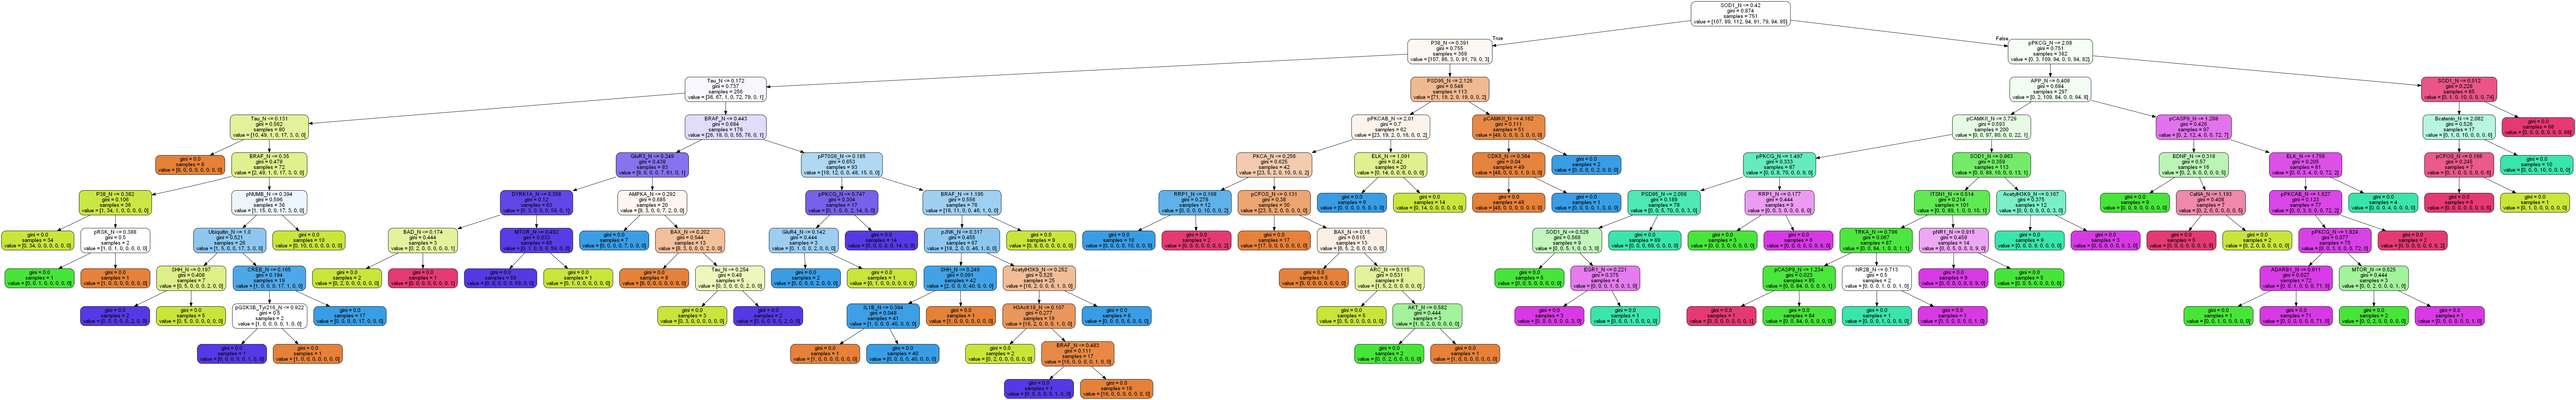

In [30]:
# Como e pode ver pela Arvore de Decisão quando o Indice Gini(tal como se fosse a Entropia), é zero já não se fazem mais 
# sub-divisões a partir desse nó(porque já não haveria ganho de informação).

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Floresta Aleatória (Com Cross-Validation)

In [329]:
from sklearn.ensemble import RandomForestClassifier

In [342]:
# Treinar o modelo

# hiperparâmetros para melhorar a previsão do modelo
# n_estimators: número de árvores construídas pelo algoritmo
# max_features: número máximo de características a serem utilizadas
# min_sample_leaf. número mínimo de folhas que devem existir em uma dada árvore.

# hiperparâmetros para melhorar a velocidade do modelo
# n_jobs: número de processadores o algoritmo pode utilizar
# random_state: torna o resultado do modelo replicável
#oob_score: método de cross validation para floresta aleatória.cerca de 1/3 dos dados não é utilizado no treino e pode ser utilizado para avaliar a performance.

rfc = RandomForestClassifier(n_estimators=100)

In [343]:
# Na Floresta Aleatoria não é necessário dividir os dados em treino e em teste, fazer o cross validation 

# Ajustar o modelo da Floresta Aleatoria com cross-validation
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [344]:
# Se a Floresta Aleatoria for feita sem cross-validation este passo não faz sentido

rfc_pred = rfc.predict(X_test)

In [345]:
# Se a Floresta Aleatoria for feita sem cross-validation este passo não faz sentido

print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      c-CS-m       0.96      1.00      0.98        43
      c-CS-s       1.00      0.95      0.98        42
      c-SC-m       1.00      0.95      0.97        38
      c-SC-s       1.00      1.00      1.00        41
      t-CS-m       1.00      1.00      1.00        44
      t-CS-s       1.00      1.00      1.00        26
      t-SC-m       0.95      1.00      0.98        41
      t-SC-s       1.00      1.00      1.00        47

   micro avg       0.99      0.99      0.99       322
   macro avg       0.99      0.99      0.99       322
weighted avg       0.99      0.99      0.99       322



In [346]:
# Se a Floresta Aleatoria for feita sem cross-validation este passo não faz sentido

print(confusion_matrix(y_test,rfc_pred))

[[43  0  0  0  0  0  0  0]
 [ 2 40  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  2  0]
 [ 0  0  0 41  0  0  0  0]
 [ 0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0 26  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 47]]


In [347]:
print("accuracy: ", round(rfc.score(X_test, y_test) * 100, 2),"%")

accuracy:  98.76 %


## Floresta Aleatória (Sem Cross-Validation)

In [316]:
from sklearn.ensemble import RandomForestClassifier

In [317]:
# treinar o modelo
rfc = RandomForestClassifier(n_estimators=100, oob_score=True)

In [318]:
# Na Floresta Aleatoria não é necessário dividir os dados em treino e em teste

# Ajustar o Modelo da Floresta Aleatoria sem cross-validation
rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [319]:
# Accuracy do modelo

print("oob score:", round(rfc.oob_score_, 4)*100, "%")

oob score: 99.25 %


### Importância das variaveis de entrada no modelo

O Sklearn mede a importância de uma variavel observando o quanto os nós, que usam essa variavel, ganham de informação. (em todas as árvores da floresta). Calcula a pontuação para cada variavel após o treino e dimensiona os resultados para que a soma da importancia de todas as variaveis seja igual a 1.
 
Pelo gráfico nota-se que algumas das variaveis de entrada não têm grande importancia para a construção do modelo.

In [320]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [321]:
importances.head(15)

,importance
feature,
SOD1_N,0.060
pPKCG_N,0.043
CaNA_N,0.032
pERK_N,0.032
ITSN1_N,0.030
APP_N,0.029
Tau_N,0.026
BRAF_N,0.026
DYRK1A_N,0.026


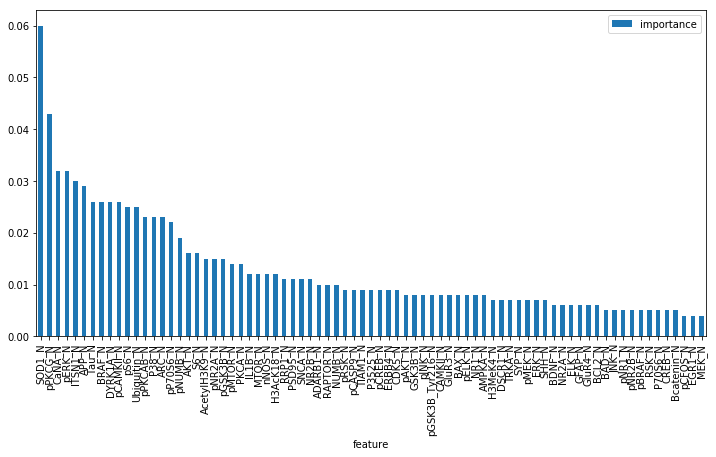

In [322]:
importances.plot(kind="bar", figsize=(12,6))

### Afinar os Hyperparâmetros
Nas florestas aleatórias não é necessario fazer cross-validation para ter uma noção do erro no conjunto de dados de teste.    
Se optar-se por usar o oob score os dados que não forem utilizados durante a construção do modelo, são usados para estimar a accuracy do modelo para esses dados.  
Cada arvore é construida utilizado aleatoriamente 2/3 dos dados totais e restante(1/3) dos dados é utilizado para teste(out-of.bag). A proxima arvore é construtinda utilizando outra vez aleatoriamente 2/3 dados totais e o restante(1/3) dos dados não utilizados ficam para teste. Este processo é repetido até se construir a floresta.   


#### Out of Bag Error  
Ot, número de dados out-of-bag da arvore t     
nt, número de arvores da floresta  
soma do número de dados out-of-bag correctamente classificados em cada arvore a dividir pelo número de dados out-of-bag total  
<img src="fotos/oob.png" width="200"/>    

#### k-fold cross-validation  
Kt, sub conjunto de teste  
f, floresta   
soma do número de dados correctamente classificados em cada sub conjunto de teste a dividir pelo número de dados total em cada sub conjunto de teste  
<img src="fotos/oob1.png" width="200"/>    

O oob apresenta um resultado semelhante ao leave-one-out cross-validation.      
Ao contrario da cross validation o oob score não é inviesado(por causa de subconjuntos de dados com dados semelhantes).     
O oob score tem um precisão semelhante ao cross validation com 50% dos dados para treino e 50% para teste.       
  
O oob score pode ser utilizado para afinar hyperparâmetros. O parâmetro ao qual a Floresta Aleatória é um pouco sensivel é o número de variaveis de entrada usadas. O melhor número para este parâmetro pode ser identificado utilizando o oob score.           


In [326]:
# max_features: número máximo de características a serem utilizadas
rfc = RandomForestClassifier( n_estimators=20, max_features=1, oob_score=True)

In [327]:
# Ajustar o Modelo da Floresta Aleatoria sem cross-validation
rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [328]:
# A accuracy obtida utilizando o oob score

print("oob score:", round(rfc.oob_score_, 4)*100, "%")

oob score: 89.56 %


## Support Vector Machine  <a name="svm"></a>  

O algoritmo de Support Vector Machine é um modelo Supervisionado que pode ser utilizado como de Classificação e Regressão(Neste exemplo utilizou-se para classificação).   
O SVC demora a fazer o treino dos dados mas a fazer previsões é rapido.  

O algoritmo SVM procura um hyperplano num espaço n-dimensional, sendo n o numero de variaveis, que classifique os dados.
Para se separar duas classes de dados, existem muitos hyperplanos possiveis. O objectivo é escolher o plano que tenha a margem máxima. Ou seja a maior distancia entre pontos das 2 classes. Ao se maximixar a distancia da margem, está-se a garantir maior precisão na classificação desses pontos(porque as classes ficam mais afastadas).  
  
<table><tr>
<td> <img src="fotos/svm.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="fotos/svm1.png" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>


Hyperplanos são limites de decisão que ajudam a cassificar pontos. Os pontos que pertencerem a cada lado do hyperplano, são classificados como pertencendo a classes diferentes. A dimensão do hyperplano depende do numero de variaveis de entrada consideradas. Se o numero de variaveis forem 2, o hyperplano é uma linha. Se forem 3, o hyperplano é um plano. Para variaveis superior torna-se dificil visualizar. 

<table><tr>
<td> <img src="fotos/svm2.png" alt="Drawing" style="width: 550px;"/> </td>
</tr></table>

Os vectores de suporte são pontes que estão proximos ao hyperplano e influenciam a possição e orientação deste. Ao usar estes vectores de suporte está-se a maximizar a margem. Apagar os vectores de suporte altera a posição do hyperplano. Estes vectores de suporte ajudam a construir o modelo SVM.

<table><tr>
<td> <img src="fotos/svm3.jpg" alt="Drawing" style="width: 550px;"/> </td>
</tr></table>

#### Margem: 
No SVM pega-se no valor da função linear e se esse valor for superior a 1, o ponto pertence a uma classe. Se o valor for inferior a -1 pertence a outra classe. Então os valores que separam uma classe da outra variam entre 1 e -1. Essa gama de valores [-1,1] actuam como margem.  

<table><tr>
<td> <img src="fotos/svm13.png" alt="Drawing" style="width: 450px;height: 100px;"/> </td>
<td> <img src="fotos/svm14.png" alt="Drawing" style="width: 450px;height: 100px;"/> </td>
</tr></table>

Uma margem é boa quando a separação é semelhantemente grande para as duas classes. Uma margem boa permite que os pontos estajam na sua classe sem passarem para a outra classe.

<table><tr>
<td> <img src="fotos/svm4.png" alt="Drawing" style="width: 450px;"/> </td>
</tr></table>  
Os valores de w e b são encontrados resolvendo a seguinte equação quadratica:
<img src="fotos/svm6.png" alt="Drawing" style="width: 250px;"/> </td>  


#### Função Custo:  
No SVM está-se à procura de maximizar a margem entre os pontos e o hyperplano. A função de perda que ajuda nessa maximização é a hinge loss.      
Uma função de perda é uma função usada para avaliar quão bem uma barreira separa os dados. A hing loss function não se preocupa com os pontos correctamente classificados, desde que estejam correctos, mas impõe uma penalização para pontos incorrectamente penalizados que é directamente porporcional ao quão afastados para o lado errado da barreira estão esses pontos.    

<table><tr>
<td> <img src="fotos/svm5.png" alt="Drawing" style="width: 450px;"/> </td>
</tr></table>


Se as classes dos dados forem possiveis de ser separadas por uma função linear, existe apenas um hyperplano que maximiza a margem. A analise ideal deveria produzir um hyperplano que separasse completamente as classes dos dados. Contudo essa separação pode não ser possivel, ou pode resultar num modelo ineficiente. Nesse caso o SVM encontra o hiperplano que maximiza a margem e minimiza os pontos mal classificados.  

A função de custo é 0 quando o valor previsto e o valor real têm o mesmo sinal(positivo ou negativo). Se for diferente calcula-se o valor da perda. Tambem se adiciona um parametro de regularização à função de custo para ajustar a maximização da margem com a minimização das perdas(más classificações).        

<table><tr>
<td> <img src="fotos/svm3.png" alt="Drawing" style="width: 450px;"/> </td>
</tr></table>

$\vec{\mathbf{w}}\cdot \vec{\mathbf{x}}+b = 0; $    Hyperplano  
$\vec{\mathbf{w}}\cdot \vec{\mathbf{x}}+b = 1; $    Distancia até ao hyperplano  
$\vec{\mathbf{w}}\cdot \vec{\mathbf{x}}+b = -1; $    Distancia até ao hyperplano  


#### Transformação do plano (Kernel): 

Se houver um conjunto de dados que uma linha recta(ou um plano) não consiga separar eficientemente em 2 classes distintas no plano x-y(ou num plano 3d) aplica-se uma transformação e adiciona-se mais um plano(z). O valor dos pontos nesse plano é  w = x² + y². Assim já é possivel traçar um hyperplano linear com as distancias dos pontos relativas ao plano z.    
Quando se transforma de novo para o plano original está criada uma barreira circular(hyperplano não linear) que separa os dados. Estas transformações são chamadas de kernels.  

<table><tr>
<td> <img src="fotos/svm7.png" alt="Drawing" style="width: 550px;height: 100px;"/> </td>
<td> <img src="fotos/svm8.png" alt="Drawing" style="width: 550px;height: 100px;"/> </td>
<td> <img src="fotos/svm9.png" alt="Drawing" style="width: 550px;height: 100px;"/> </td>  
</tr></table>

No hyperparametro kernel escolhe-se o hyperplano para separar as classes. linear para usar um hyperplano linear(uma linha no caso de dados 2d).‘rbf’ e ‘poly’ para um hyperplano não linear.   

<table><tr>
<td> <img src="fotos/svm26.png" alt="Drawing" style="width: 550px;height: 200px;"/> </td>
<td> <img src="fotos/svm27.png" alt="Drawing" style="width: 550px;height: 200px;"/> </td>
<td> <img src="fotos/svm28.png" alt="Drawing" style="width: 550px;height: 200px;"/> </td>  
</tr></table>



#### Sobreposição de pontos (Regularização):  

<table><tr>
<td> <img src="fotos/svm10.png" alt="Drawing" style="width: 550px;height: 100px;"/> </td>
<td> <img src="fotos/svm11.png" alt="Drawing" style="width: 550px;height: 100px;"/> </td>
<td> <img src="fotos/svm12.png" alt="Drawing" style="width: 550px;height: 100px;"/> </td>  
</tr></table>


Quando existe sobreposição de pontos, pode-se usar uma separação que tolere pontos mal classificados ou tentar criar um hyperplano que separe todos os pontos perfeitamente. Esta ultima solução tem a desvantagem de tornar o algoritmo mais lento pois tenta encontrar a classificação correcta para todos os pontos.    
Na imagem de cima do meio o hyperparâmetro de regularização tem um valor baixo(viês alto, variância baixa) e na imagem da direita um valor alto(viês baixo, variância alta).    

<table><tr>
<td> <img src="fotos/svm23.png" alt="Drawing" style="width: 550px;height: 200px;"/> </td>
<td> <img src="fotos/svm24.png" alt="Drawing" style="width: 550px;height: 200px;"/> </td>
<td> <img src="fotos/svm25.png" alt="Drawing" style="width: 550px;height: 200px;"/> </td>  
</tr></table>

O hyperparametro regularização(C no sklearn) indica o quanto se quer evitar pontos mal classificados no conjunto de treino.  
Para valores grandes de C, a optimização é feita escolhendo um hyperplano com uma margem mais pequena se esse hiperplano fizer um melhor trabalho a classificar todos os pontos correctamente(pode levar ao overfitting).  
Para valores de C mais baixos será escolhida um hyperplano com uma margem maior, mesmo que isso implique algums pontos mal classificados.      

#### Gamma:  

<table><tr>
<td> <img src="fotos/svm15.png" alt="Drawing" style="width: 450px;height: 100px;"/> </td>
<td> <img src="fotos/svm16.png" alt="Drawing" style="width: 450px;height: 100px;"/> </td> 
</tr></table> 

 
Com valores baixos de gamma, os pontos mais afastados da possivel linha de separação são considerados no calculo dessa linha. Para valores altos apenas são considerados nos calculos os pontos mais proximos.  
Pode ser visto como inverso do raio de influência dos pontos escolhidos para vectores de suporte.   

<table><tr>
<td> <img src="fotos/svm20.png" alt="Drawing" style="width: 550px;height: 200px;"/> </td>
<td> <img src="fotos/svm21.png" alt="Drawing" style="width: 550px;height: 200px;"/> </td>
<td> <img src="fotos/svm22.png" alt="Drawing" style="width: 550px;height: 200px;"/> </td>  
</tr></table>

Hyperparametro para hyperplanos não lineares (kernel 'rbf').   
Se o valor de gamma for demasiado alto o raio da area de influência dos vectores de suporte apenas contem os vectores de suporte e pode levar ao overfitting.    
Se for demasiado baixo o modelo não consegue capturar o comportamento pontos perto do hyperplano e pode levar ao underfitting. 

Tem-se de encontrar um modelo com um valor de C e gamma em que erro no conjunto de treino seja pequeno mas que generalize bem as previsões para conjuntos de dados não vistos.    

#### Comportamento em problemas Multi-Dimensionais
OSVM são parte de uma classe de algoritmos de classificação chamados Metodos Kernel.  
O uso do Kernel trick, o teorema do representante(representer theorem) e o uso da regularização faz com que este algoritmo tenha um bom comportamento quanto à madição da dimensionalidade.  
Metodos Kernel trabalham com distancias entre pontos, independentemente da dimensionalidade onde essa distancia é definida.  



### Divisão Treino-Teste  

In [13]:
# X - variáveis usadas para modelar o modelo
X = df.drop(["MouseID","class","Genotype","Treatment","Behavior"], axis=1)
X.head(1)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.21883,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.134762,0.106305,0.108336,0.427099,0.114783,0.13179,0.128186,1.675652


In [14]:
# y - variavel que se pretende avaliar
y = df["class"]
y.head(1)

0    c-CS-m
Name: class, dtype: object

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#São usados 30% dos dados do dataset para fazer o teste do modelo
#São usados 70% dos dados para treinar o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Treinar e Ajustar o modelo de Support Vector Machine

In [157]:
from sklearn.svm import SVC

In [158]:
# treinar o modelo
svc = SVC(gamma="auto")

In [163]:
# Ajustar o Modelo 
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Previsão e avaliação do modelo

In [164]:
# Prever os dados de saida para os dados de teste de modo se poder fazer a avaliação do modelo
prediction = svc.predict(X_test)

In [165]:
from sklearn.metrics import classification_report, confusion_matrix

In [166]:
#Relatório de classificação
#Ver como o modelo se ajusta para os dados de teste
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

      c-CS-m       0.98      0.86      0.92        57
      c-CS-s       0.66      0.91      0.77        34
      c-SC-m       1.00      0.91      0.95        46
      c-SC-s       1.00      1.00      1.00        43
      t-CS-m       0.93      0.79      0.85        33
      t-CS-s       1.00      0.96      0.98        26
      t-SC-m       0.90      1.00      0.95        37
      t-SC-s       1.00      1.00      1.00        46

   micro avg       0.93      0.93      0.93       322
   macro avg       0.93      0.93      0.93       322
weighted avg       0.94      0.93      0.93       322



In [24]:
confusion = confusion_matrix(y_test,prediction)

In [25]:
#Matriz de confusão
outside_columns = ["","","","Predicted","","","",""]
outside_index = ["","","","Actual","","","",""]
inside = ["c-CS-m","c-CS-s","c-SC-m","c-SC-s","t-CS-m","t-CS-s","t-SC-m","t-SC-s"]

hier_columns = list(zip(outside_columns, inside))
hier_columns = pd.MultiIndex.from_tuples(hier_columns)

hier_index = list(zip(outside_index, inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

pd.DataFrame(confusion, columns=hier_columns, index = hier_index)

Predicted                            
              c-CS-m c-CS-s c-SC-m    c-SC-s t-CS-m t-CS-s t-SC-m t-SC-s
       c-CS-m     34      0      0         1     14      0      0      1
       c-CS-s     28      2      2         1      9      5      0      0
       c-SC-m      0      0     41         0      0      0      1      0
Actual c-SC-s      0      0      0        38      0      0      1      4
       t-CS-m      4      0      0         0     24      0      0      0
       t-CS-s      6      0      0         0     13      5      0      1
       t-SC-m      0      0     15        11      0      0     15      0
       t-SC-s      0      0      7         0      0      0      0     39

### Afinar os Hyperparâmetros

Encontrar os parâmetros certos pode ser demorado se for feito criando um modelo novo e testando combinação a combinação.  
Pode-se recorrer ao skearn para criar uma "grade" de parâmetros e experimentar todas as combinações possiveis.  

O GridSearchCV usa um dicionário que descreve os parâmetros a ser testados e o modelo a treinar. A grade de parâmetros é definida como um dicionário, onde as chaves são os parâmetros e os valores são as configurações a serem testadas.  

O grid.fit executa todas as combinações de parâmetros para encontrar a melhor para os dados de treino.   
Para avaliar qual é a melhor combinação utiliza a validação cruzada(apenas parte dos dados de treino são usados para treino).    Com a melhor combinação faz o ajuste do modelo a todos os dados de treino(já não faz a validação cruzada).  
Para isso tem de se escolher refit=True.  

In [120]:
# Parametros que vão ser testados
# C por defeito = 1
# gamma por defeito = 1/(nº variaveis entrada)
# kernel por defeito = linear
param_grid = {"C": [0.1, 1, 10, 100, 1000], "gamma": [1, 0.1, 0.01, 0.001, 0.0001], "kernel": ["rbf"]}

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
#  Construção da grelha
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=3, iid=True)

In [123]:
# Ajustar o modelo SVC para os parametros escolhidos e para o conjunto de dados de treino
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [124]:
# Os melhores parametros para o modelo
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [125]:
# A melhor previsão é obtida com os seguintes hyperparâmetros
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [126]:
# Fazer a previsão usando os melhores hyperparâmetros para o modelo
# Tambem podia ser feito construindo um modelo de novo com os novos hyperparâmetros
prediction = grid.predict(X_test)

In [127]:
# Novo relatório de classificação
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

      c-CS-m       1.00      1.00      1.00        50
      c-CS-s       1.00      1.00      1.00        47
      c-SC-m       0.98      1.00      0.99        42
      c-SC-s       1.00      1.00      1.00        43
      t-CS-m       1.00      1.00      1.00        28
      t-CS-s       1.00      1.00      1.00        25
      t-SC-m       1.00      0.98      0.99        41
      t-SC-s       1.00      1.00      1.00        46

   micro avg       1.00      1.00      1.00       322
   macro avg       1.00      1.00      1.00       322
weighted avg       1.00      1.00      1.00       322



O desempenho do modelo melhorou muito.
Mas escolhe o valor de C mais alto que se coloque na grelha, ou seja, o valor que se ajusta melhor aos dados de teste e pode provocar overffiting.  

# Modelos não Supervisionados <a name="nsupervisionados"></a>  

Os modelos de aprendizagem não supervisionada permitem abordar problemas com pouca ou nenhuma ideia do que os resultados devem ser(sem dados de saida). Pode ser usada para agrupar dados com base nas relações entre as variaveis de entrada e tambem pode ser usado para reduzir o número de dimensões de um conjunto de dados(de modo a descobrir tendencias ou os atributos mais uteis).  

Os algoritmos não supervisionados não podem ser directamente aplicados a problemas de regressão ou de classificação, porque não se tem uma ideia de como os dados de saida devem ser e não se pode treinar o modelo.  
Algumas das aplicações dos algoritmos não supervisonados são:

- Agrupamento: dividir o conjunto de dados de acordo com a sua semelhança.    
- Detecção de Anomalias: detectar anomaliar/outliers em transacções,descobrir peças defeituosas ou um erro durante a inserção de dados.  
- Associação entre as variaveis de entrada: produtos comprados ao mesmo tempo, relação entre o aumento de uma valvula de pressão e o aumento de temperatura numa câmara frigorifica.  
- Pré-processamento de dados: reduzir a dimensão do dataset(excluir variaveis que não acrescentam ao modelo).     

Os padrões que se descobrem ao utilizar os algoritmos não supervisionados, podem ser depois utilizados quando se for implemntar o algoritmo supervisionado. Por exemplo pode-se utilizar um algoritmo são supervisionado para agrupar os dados e depois utilizar estes dados como uma coluna extra do algoritmo supervisionado.  Ou em detecção de fraudes em que o modelo supervisonado utiliza a detecção de anomalias/outliers(detectadas utilzando um algoritmo não supervisionado de agrupamento) como uma coluna extra.  

Os modelos não supervisionados dividem-se em problemas de agrupamento e de associação:

##### Agrupamento(Clustering):
Estes algoritmos são utilizados para descobrir grupos de dados nos dados de entrada (por exemplo o algoritmo K-Means).   

Por vezes quando existem muitas variaveis de entrada e de modo a reduzir a número de variaveis em analise utiliza-se um algoritmo não supervisionado de pré-processamento de dados(por ex. o Principal Component Analysis) de modo a reduzir a dimensionalidade desses dados.   
Isto é importante porque à medida que mais variaveis são consideradas, os dados tornam-se mais complicados de tratar pelo algoritmo. 
  
##### Associação(Association):  
Estes algoritoms são utilzados para descrever a relação entre as variaveis dos dados de entrada (por ex. o algoritmo Apriori). 

<table><tr>
<td> <img src="fotos/nsuper.png" alt="Drawing" style="width: 550px;height: 300px;"/> </td>
</tr></table>

## K-Means <a name="kmeans"></a>  

O K-means é um algoritmo não supervisionado de classificação(clustering) para agrupamento de dados de acordo com a sua classe.    
O algoritmo fornece uma classificação dos seus dados de entrada de acordo com os próprios dados. Esta classificação feita com base na análise e comparação entre os valores numéricos dos dados. O algoritmo fornece uma classificação sem a necessidade de supervisão humana, ou seja, sem a existencia de pré-classificação dos dados.    

Os dados devem ser contínuos, mas antes da utilização do algoritmo podem-se converter dados discretos para valores numéricos correspondentes.     

O algoritmo analisa todos os dados e cria classificações, ou seja, indica uma classe (cluster) e diz quais linhas pertencem a essa classe. O número de classes(k) em que se dividem os dados é fornecido pelo utilizador.      
Para gerar as classes e classificar os dados, o algoritmo faz a comparação entre cada valor de cada linha por meio da distância. Geralmente utiliza-se a distância euclidiana para calcular o quão ‘distante’ uma ocorrência está da outra.  
Após o cálculo das distâncias o algoritmo calcula centroides(centro de cada classe) para cada uma das classes. Conforme o algoritmo vai iterando, o valor de cada centroide é refinado pela média dos valores dos pontos que pertencem a esse centroide. Com isso, o algoritmo gera k centroides e coloca os pontos da tabela de acordo com sua distância dos centroides.  

#### Inicialização dos centroides:
A forma como se inicializam os centroides vai produzir resultados diferente.   
Por exemplo um centroide colocado no lado superior direito, outro no lado inferior direiro e outro no lado esquerdo vai produzir um cluster com os dados do lado esquerdo e 2 clusters com os dados do lado direito(imagem do meio).   
Se os centroides forem inicializados com um centroide do lado direiro e 2 do lado esquerdo vai produzir 1 cluster do lado esquerdo e 2 do lado direito(imagem da direita).      

<table><tr>
<td> <img src="fotos/k1.png" alt="Drawing" style="width: 200px;height: 200px;"/> </td>
<td> <img src="fotos/k3.png" alt="Drawing" style="width: 200px;height: 200px;"/> </td>   
<td> <img src="fotos/k3.png" alt="Drawing" style="width: 200px;height: 200px;"/> </td>     
</tr></table>

Para contornar este problema pode-se utilizar o modo de inicialização k-means++(existe essa opção no skit-learn), onde se seleccionam os centrides que estejam afastados uns dos outros. O 1º centroide é gerado aleatoriamente e os seguintes são gerados com base na distancia para o 1º centroide.    

#### Passos do algoritmo:
- Fornecer valores para os centroides: Os k centroides devem receber valores iniciais. No início do algoritmo geralmente escolhe-se os k primeiros pontos da tabela. Todos os pontos devem estar em um centroide. 

- Gerar uma matriz de distância entre cada ponto e os centroides: Neste passo, a distância entre cada ponto e os centroides é calculada. A parte mais ‘pesada’ de cálculos ocorre neste passo pois se temos N pontos e k centroides teremos que calcular N x k distâncias neste passo.    


- Colocar cada ponto nas classes de acordo com a sua distância do centroide da classe: Os pontos são classificados de acordo com sua distância dos centroides de cada classe. A classificação funciona do seguinte modo: o centroide que está mais perto desse ponto vai ‘incorporá-lo’, ou seja, o ponto vai pertencer à classe representada pelo centroide que está mais perto do ponto. O algoritmo termina se nenhum ponto ‘mudar’ de classe, ou seja, se nenhum ponto for ‘incorporado’ a uma classe diferente da que ele estava antes deste passo.   


- Calcular os novos centroides para cada classe: neste momento, os valores das coordenadas dos centroides são refinados. Para cada classe que possui mais de um ponto o novo valor dos centroides é calculado fazendo-se a média de cada ponto que pertencam a essa classe.    


- Repetir até a convergência: o algoritmo volta para o PASSO 02(Gerar matriz) repetindo iterativamente o refinamento do cálculo das coordenadas dos centroides. Desta maneira tem-se uma classificação que coloca cada ponto em apenas uma classe. Desta maneira diz-se que este algoritmo faz uma classificação hard (hard clustering) uma vez que cada ponto só pode ser classificado em uma classe. Outros algoritmos trabalham com o conceito de classificação soft onde existe uma métrica que diz o quão ‘dentro’ de cada classe o ponto está.    
O resultado obtido pode ser um optimo local(e não necesáriamente a melhor solução). Ao correr outra vez o algoritmo, com novos centroides aleatorios, pode levar a um resultado melhor. 

<table><tr>
<td> <img src="fotos/kmeans1.png" alt="Drawing" style="width: 550px;height: 300px;"/> </td>
</tr></table>

#### Escolher o valor de K:
Para encontrar o melhor valor de K normalmente corre-se o alguritmo para uma gama de valores de K e comparam-se os resultados. 
Nao existe um método para determinar um valor exacto de k, mas pode-se fazer uma estimativa.
Um dos métodos consistem em comparar a distancia média entre os pontos e o centro dos seus centroides para varios valores de K, e encontrar o "ponto cotovelo" deste gráfico(onde exite uma descida acentuada).
Ao aumentar o numero de clusters reduz-se a distancia do seus centro para os pontos. Aumentando k, decresce sempre esta distancia, até ser zero, quando k é igual ao numero de pontos.  

<table><tr>
<td> <img src="fotos/kmeans2.png" alt="Drawing" style="width: 550px;height: 300px;"/> </td>
</tr></table>

Outras técnicas podem ser utilizadas para encontrar um valor de K, como a ross-validation, information criteria, the information theoretic jump method, the silhouette method, and the G-means algorithm.  

#### Vantagens:
- Todos os pontos são automaticamente atribuídos a um grupo.  
- A localização inicial do contróide do grupo pode variar, permitindo estabelecer condições iniciais de dependência.  

##### Desvantagens:
- Antes do algoritmo ser iniciado tem de ser escolhido o número de grupos.  
- Todos os pontos são forçados a pertencer a um grupo (hard clustering). 
- O resultado obtido pode não ser o optimo global.
- Pode ser lento para grandes numeros de dados.
- Funciona apenas para barreiras lineares. Ao utilizar-se o algoritmo está-se a assumir que as barreiras de decisão são lineares, o que faz o algoritmo não funcionar bem para conjunto de dados mais complicados.  

Existem problemas de classificação lineares e não-lineares. Num problema linear pode-se traçar linhas, planos ou hiperplanos dependendo do numero de dimensões do problema de modo a classificar correctamente todos os pontos.  Num problma não linear não se pode fazer isso. Linhas, planos e hiperplanos são as barreiras de decisão.  
O k-Means produz um diagrama de Voronoi que consiste em multiplos limites de decisão lineares(ver figura abaixo).  
O SVM são capazes de tratar problemas lineares traçando o hyperplano. E utilizando o truque Kernel conseguem transformar um problema não linear em linear.  
   
<table><tr>
<td> <img src="fotos/kmeans8.png" alt="Drawing" style="width: 500px;height: 300px;"/> </td>
</tr></table>

Os pontos proximos pertencem ao mesmo cluster, enquanto pontos distantes pertencem a clusters diferentes. Mas num grande número de dimensões a distancia eucladiana não funcionam muito bem. Pode-se reduzir esse número de dimensões para que a escala de distancias faça sentido(por ex. utilizando o PCA). Esta redução de dimensionalidade tambem pode ser utilizada para algoritmos supervionados que dependam da distancia.  
  
#### Exemplo
Aplicar K-Means para um exemplo com 1 dimensão(1 atributo).  
Conjunto de dados {2, 4, 10, 12, 3, 20, 30, 11, 25}    
Escolher aleatoriamente k=2.

- Iteração 1:

M1, M2 são os 2 centroides aleatorios/média:
M1= 4, M2=11

Os clusters iniciais são:
C1= {4}, C2= {11}

Calular a distancia Euclidiana:

D=[x,a]=√(x-a)²

D1 é a distancia desde M1.  
D2 é a distancia desde M2.  

<table><tr>
<td> <img src="fotos/kmeans3.jpeg" alt="Drawing" style="width: 300px;height: 150px;"/> </td>
</tr></table>

Na tabela acima pode-se ver que 2 pontos foram adicionados ao cluster C1 e os restantes ao cluster C2.  
Ficando os clusters:  
C1= {2, 4, 3}
C2= {10, 12, 20, 30, 11, 25}

- Iteração 2

Calcular a nova média dos pontos em C1 e C2.  
M1= (2+3+4)/3= 3  
M2= (10+12+20+30+11+25)/6= 18  

Calcular a distancia e actualizar os clusters com base na tabela abaixo.  
<table><tr>
<td> <img src="fotos/kmeans4.jpeg" alt="Drawing" style="width: 300px;height: 150px;"/> </td>
</tr></table>

Novos clusters:  
C1= {2, 3, 4, 10}  
C2= {12, 20, 30, 11, 25}  

- Iteração 3

Calcular a nova média dos pontos em C1 e C2.
M1= (2+3+4+10)/4= 4.75
M2= (12+20+30+11+25)/5= 19.6

Calcular a distancia e actualizar os clusters com base na tabela abaixo.  
<table><tr>
<td> <img src="fotos/kmeans5.jpeg" alt="Drawing" style="width: 300px;height: 150px;"/> </td>
</tr></table>

Novos clusters:    
C1= {2, 3, 4, 10, 12, 11}  
C2= {20, 30, 25}  

- Iteração 4

Calcular a nova média dos pontos em C1 e C2.  
M1= (2+3+4+10+12+11)/6=7  
M2= (20+30+25)/3= 25  

Calcular a distancia e actualizar os clusters com base na tabela abaixo.  
<table><tr>
<td> <img src="fotos/kmeans6.jpeg" alt="Drawing" style="width: 300px;height: 150px;"/> </td>
</tr></table>

Novos clusters:    
C1= {2, 3, 4, 10, 12, 11}  
C2= {20, 30, 25}  

Os pontos nos clusters C1 e C2 não mudaram da iteração 3 para a iteração 4. Nenhum dos pontos mudou de cluster e os centroides/médias dos clusters são constantes.   

### Dados
Vão-se utilizar as colunas das proteinas como dados de entrada para tentar agrupar por classes. Apesar de se ter a classificação para estas colunas vai-se tratar este exemplo como um algoritmo não classificado.    

In [37]:
X = df.drop(["MouseID","class","Genotype","Treatment","Behavior"], axis=1)

In [38]:
X.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.134762,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.134762,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.134762,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.134762,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.134762,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730


## Visualização dos dados

In [39]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'BDNF_N')

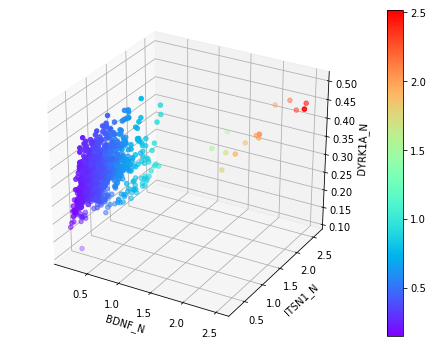

In [40]:
# Visualização da relação entre as leituras das 3 primeiras proteinas 
# Não é possivel fazer uma visualização facil dos dados para este dataset porque exitem muitas variaveis de entrada.
# Deveria plotar o sns.PairGrid(X) para avaliar a relação entre todas as variaveis, mas é muito pesado.
# Estas visualizações não são suficientes para tirar conslusões.  

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2],c=X.iloc[:,0], cmap="rainbow")

fig.colorbar(p)
ax.set_zlabel('DYRK1A_N')
ax.set_ylabel('ITSN1_N')
ax.set_xlabel('BDNF_N')


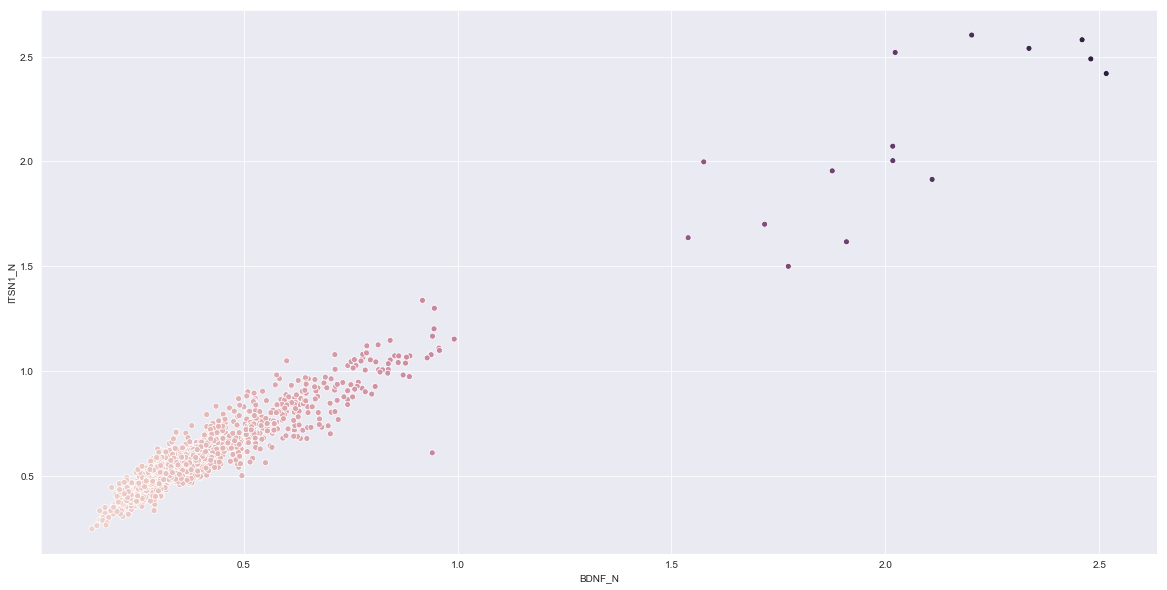

In [41]:
# Visualização da relação entre as leituras de 2 primeiras proteinas

sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))

ax = sns.scatterplot(X.iloc[:,0], X.iloc[:,1], data=X, hue=X.iloc[:,0], legend=False)

ax.set_ylabel('ITSN1_N')
ax.set_xlabel('BDNF_N')

plt.show()

Olhando para o gráfico pode-se agrupar começar por agrupar os dados em 2 classes, assumindo que todas as restantes classes têm a mesma relação.

## Criar os Clusters

In [42]:
from sklearn.cluster import KMeans

In [43]:
# n_clusters=2 devido à primeira visualização
# n_clusters=3 devido ao método do cotovelo
# Para encontrar o melhor número de clusters utilizar o método do cotovelo
kmeans = KMeans(n_clusters=3)

In [44]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
#Tem-se 2 clusters com o seu centro a ser definido por 77 dimensões.
kmeans.cluster_centers_

array([[0.36335143, 0.5284737 , 0.28403898, 2.01949396, 3.07697622,
        0.22137031, 0.17483244, 2.73310356, 0.19594659, 1.26599398,
        0.45835932, 0.28523799, 0.28540013, 0.25707951, 0.73399485,
        0.60562495, 1.33562969, 1.32070089, 0.42315926, 0.60979026,
        0.33636976, 0.34130847, 0.1742595 , 0.94857933, 2.03054783,
        1.03263129, 0.22651447, 0.24688357, 0.60156086, 0.1628605 ,
        0.37429409, 1.80141211, 0.53008852, 0.42828385, 0.40814413,
        0.69288313, 0.55838466, 0.33421762, 0.52273162, 0.32917103,
        0.29935225, 0.38756284, 0.38701148, 0.16837249, 0.86028154,
        0.15910721, 1.66910669, 0.27992942, 0.42059795, 0.98499086,
        0.25203366, 0.16970403, 0.17028556, 0.11673922, 0.15204752,
        0.17144375, 0.2172918 , 0.12290029, 0.21535401, 0.11943177,
        0.53862012, 0.28928677, 1.48089532, 2.15080979, 0.16401298,
        1.18796589, 0.83176677, 0.23251148, 0.16507946, 0.13873846,
        0.11673922, 0.13950269, 0.41279329, 0.17

In [46]:
# O agrupamento é feito em clusters com o nome 0 e 1.
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

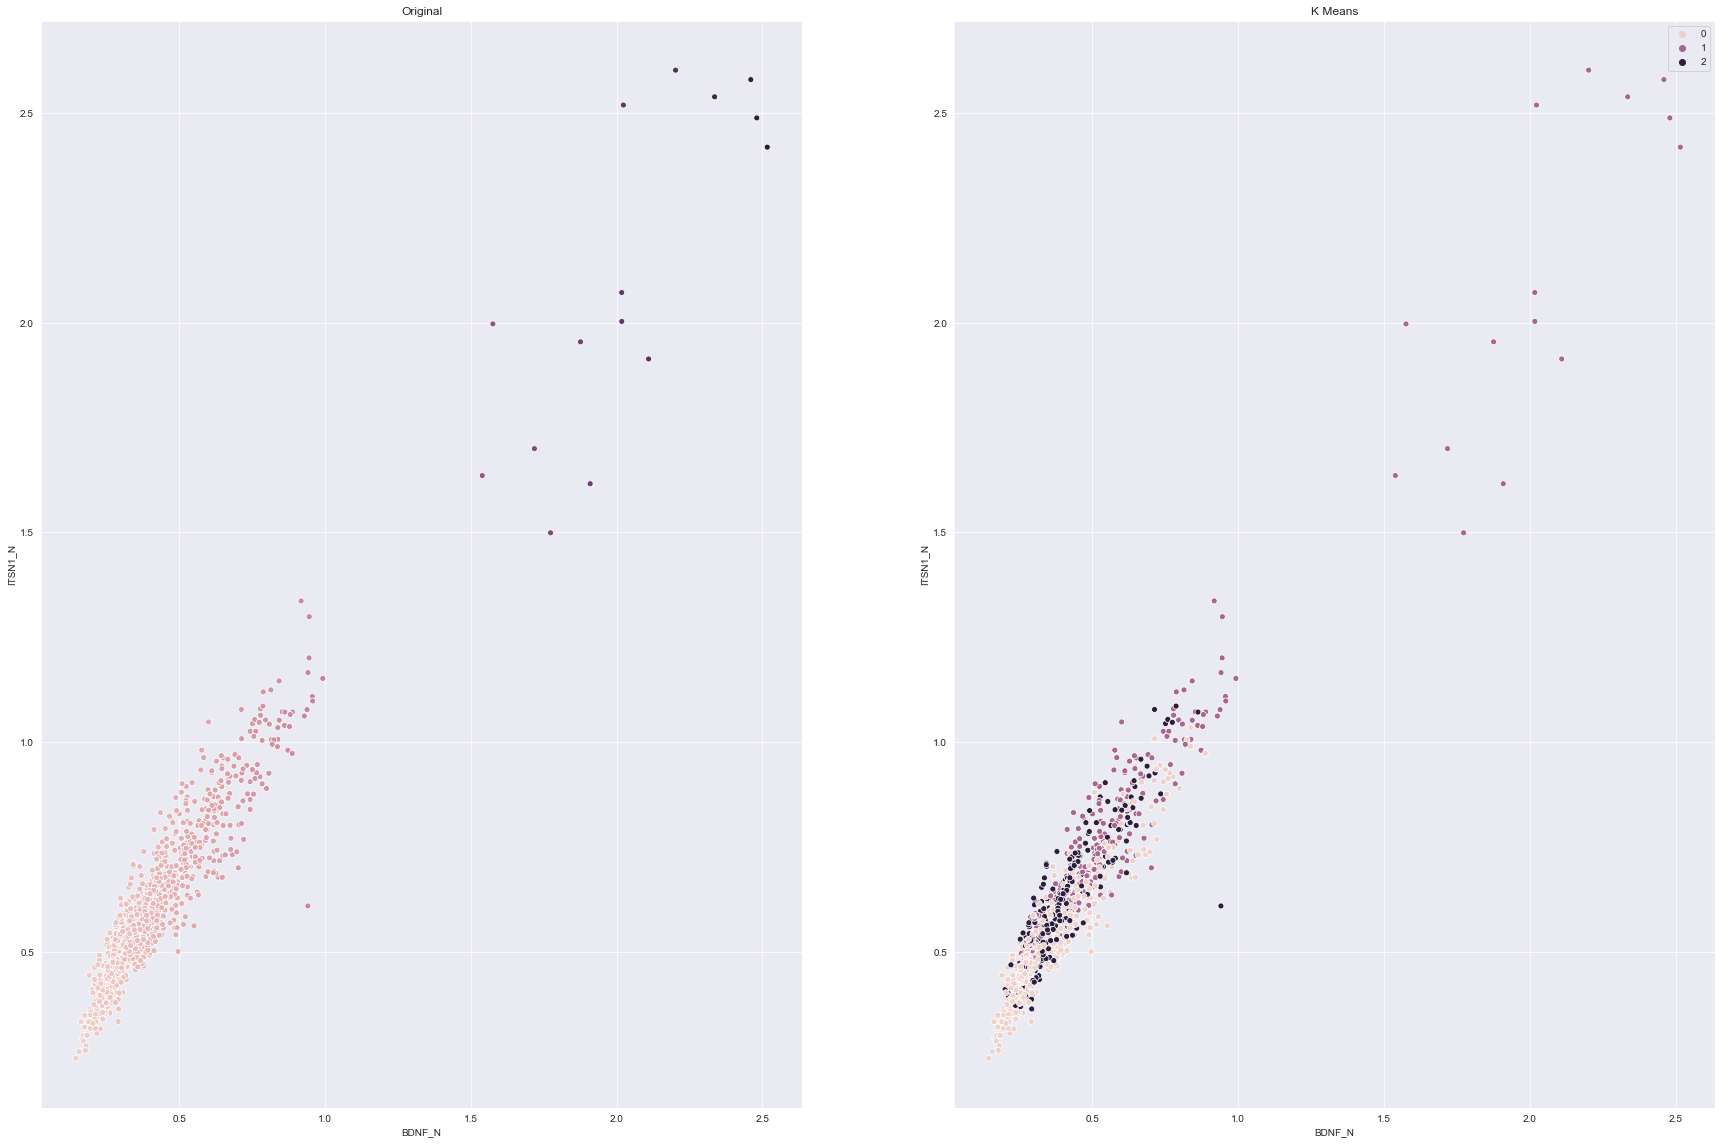

In [47]:
# Visualização da relação entre as leituras das 2 primeiras proteinas
sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 20))

ax1 = sns.scatterplot(X.iloc[:,0], X.iloc[:,1], data=X, hue=X.iloc[:,0], legend=False, ax=ax[0])
ax1.set_ylabel('ITSN1_N')
ax1.set_xlabel('BDNF_N')
ax1.set_title('Original')

# Visualização da relação entre as leituras das 2 primeiras proteinas agrupadas pelo K-Means
ax2 = sns.scatterplot(X.iloc[:,0], X.iloc[:,1], data=X, hue=kmeans.labels_, ax=ax[1])
ax2.set_ylabel('ITSN1_N')
ax2.set_xlabel('BDNF_N')
ax2.set_title('K Means')

plt.show()

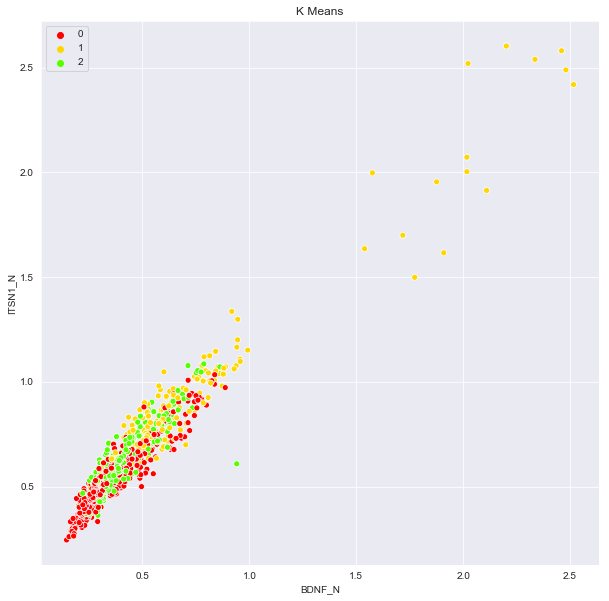

In [48]:
# Visualização da relação entre as leituras das 2 primeiras proteinas agrupadas pelo K-Means

sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

ax = sns.scatterplot(X.iloc[:,0], X.iloc[:,1], data=X, hue=kmeans.labels_, palette="prism")

ax.set_ylabel('ITSN1_N')
ax.set_xlabel('BDNF_N')
ax.set_title('K Means')

plt.show()

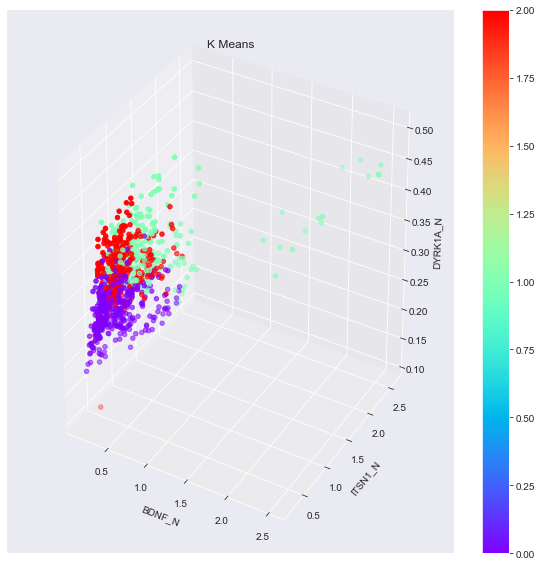

In [49]:
# Visualização da relação entre as leituras das 3 primeiras proteinas agrupadas pelo K-Means

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=kmeans.labels_, cmap="rainbow")

fig.colorbar(p)
ax.set_zlabel('DYRK1A_N')
ax.set_ylabel('ITSN1_N')
ax.set_xlabel('BDNF_N')
ax.set_title('K Means')

plt.show()

Analisando o gráfico 2d e se for semelhante para os restantes dados de entrada é possivel ver que existem dados muito distantes com classificação igual.    
Estas visualizações não são suficientes para tirar conslusões.  
Deveria plotar o sns.PairGrid(X), para avaliar esta relação para todas as variaveis, mas é demasiado pesado computacionalmente.

## Escolher um valor de K

Text(0, 0.5, 'Sum of squared distances to the cluster')

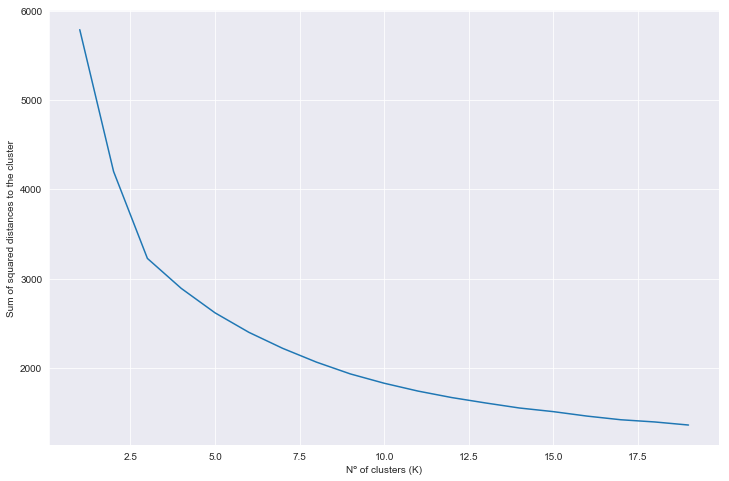

In [50]:
# O km.inertia_ retorna a soma do quadrado das  distâncias das amostras ao seu centroide mais proximo(quanto menor for a inercia
# melhor, esta varia desde 0 até infinito.

seq = {}
 
for i in range(1,20):
    km = KMeans(n_clusters=i, max_iter=1000).fit(X)
    seq[i] = km.inertia_ 
 
plt.figure(figsize=(12,8))
plt.plot(list(seq.keys()),list(seq.values()))
plt.xlabel('Nº of clusters (K)')
plt.ylabel('Sum of squared distances to the cluster')

Neste exemplo não dá para fazer a visualização dos dados devido às muitas variaveis de entrada(apenas se utilizaram 2 variaveis).  
Mas é aconselhavel fazer-se a visualiação com uma palete de cores para os dados iniciais para ver como se agrupam. Depois 
fazer o mesmo para os dados agrupados pelo K-Mean e comparar as diferenças.    

A estimativa para o número de clusters de acordo com o método do cotovelo é 3. Mas no limite deveriam ser 8, porque é o número de classes de ratos.  
Estes 3 classes encontradas pelo K-Means podem ser os 3 tipos principais: o genotipo, tratamento e comportamento.  

## Principal Component Analysis <a name="pca"></a>  

O PCA reduz o número de dimensões de um conjunto de dados, projetando os dados num novo plano. Usando essa nova projeção os dados originais, que podem envolver demasiadas variáveis(multidimensionalidade), podem ser interpretados utilizando menos "dimensões".
No conjunto de dados reduzido pode-se observar com mais clareza tendências, padrões e/ou outliers.O PCA fornece mais clareza aos padrões que estão no conjunto de dados mas que são dificeis de encontrar devido à multidimensionalidade.

O PCA projecta os dados numa dimensão mais baixa(reduz a dimensionalidade) maximizando a variancia(ou diminuindo a distancia desde o eixo escolhido) dos dados em cada eixo do componente principal.

Reduzindo o número de variaveis do conjunto de dados tem um custo na accuracy do modelo. Está-se a trocar a simplificação por uma pequena perda de accuracy. Porque conjunto de dados mais pequenos são mais faceis de explorar e visualizar e computacionalmente mais rapidos.
Está-se a transformar um dataset com um grande número de variaveis num dataset mais pequeno que continue a ter grande parte da informação contida no conjunto de dados originais(reduzir o número de variaveis preservando o máximo de informação possivel).

Ao reduzir a dimensão dos conjunto de dados tambem se está a eliminar o ruido porque tem padrões mais fracos, e está-se a identificar os padrões mais fortes.   
A redução da dimensionalidade torna o algoritmo que se utilize mais rápido em troca de precisão.  

O objectivo do PCA é encontrar uma transformação que satisfaça as seguintes condições:  
Cada par dos novos atributos tem zero covariância.  
Os atributos estão ordenados por ordem decescente do grau de variância dos dados que cada um tem.  
O primeiro atributo tem a máxima variância possivel para aquele conjunto de dados.  
Os atributos são ortogonais, cada atributo sucessivo captura o máximo possivel de variância que resta.  

#### Passos do Algoritmo
- Normalização das variaveis: 

Colocar todas as variaveis na mesma escala, de modo a que o contributo,para o modelo, de cada uma delas seja igual. O PCA é bastante sensível em relação às variâncias das variáveis iniciais, ou seja, se houver grandes diferencas nas escalas das variaveis, as variaveis de maior escala vão dominar. Por exemplo uma variavel com uma escala entre 0 e 100 vai dominar uma variavel com uma escala de 0 a 1.

- Matriz de Covariância:  

Descobrir relações entre as variaveis. Por vezes existem variaveis que são altamente correlaçionadas entre si, de uma maneira que contêem informação redundante. A matriz é pxp(p sendo o número de dimensões) que tem como entrada a covariancia(correlação) entre todos os pares de variaveis iniciais(data.corr()).   
Se o sinal for possitivo as duas variaveis crescem ou diminuem em conjunto, estão correlacionadas. Se o sinal for negativo, uma variavel cresce enquanto a outra decresce, estão inversamente correlacionadas.    
Se for zero significa que as variaveis não estão correlacionadas.  

- Autovetores(eigenvectors) e autovalores(eigenvalues) da matriz de covariância para identificar os principais componentes:  

OS autovectores e autovalores são retirados da matriz de covariância e servem para determinar os Principais Componentes.    
  
Os Componentes Principais são as novas variáveis construidas como combinação linear ou mistura das variaveis iniciais. Isto é feito de modo a que as novas variaveis(Componentes Principais) são não relacionas e a maior parte da informação das variaveis iniciais está contida nos primeiros componentes. Um conjundo de dados de 10 dimensões dà 10 principais componentes, mas o PCA tenta colocar o maximo de informação possivel no primeiro componente, depois o maximo de informação restante no segundo e por ai adiante(na figura seguinte pode-se ver a percentagem de variância(informação) por cada componente principal).  

<table><tr>
<td> <img src="fotos/pca.png" alt="Drawing" style="width: 500px;height: 300px;"/> </td>
</tr></table>

Ao organizar a informação em Componentes Principais permite reduzir a dimensionalidade sem perder muita informação, descartando componentes com pouca informação e considerando os restantes componenes como novas variaveis.  
Os Componentes Principais são mais dificeis de interpretar e não têm um significado real, já que são construidos como uma combinação linear das variaveis iniciais. 

Os principais componentes são os novos eixos que proporcionam o melhor angulo para ver e validar os dados, de modo a que as diferenças entre esses dados sejam mais visiveis.  
Os Principais Componentes representam as direcções dos dados que explicam a quantidade máxima de variancia. As linhas que capturam a maior quantidade de informação.
Ao ser traçada uma linha, quanto maior a variância, maior será a dispersão dos pontos ao longo dessa linha e assim será maior a informaão que possui.  

<table><tr>
<td> <img src="fotos/pca5.png" alt="Drawing" style="width: 400px;height: 200px;"/> </td>
<td> <img src="fotos/pca6.png" alt="Drawing" style="width: 400px;height: 200px;"/> </td>  
</tr></table>

Ao se transformar uma representação de duas dimensões para uma dimensão está-se a encontrar um linha recta e projectar os pontos nela(uma linha recta é 1-dimensional ). Existem muitas possibilidades para essa linha, na figura acima estão duas. 
A linha mangenta será a nova dimensão.  
As linhas vermelhas(conectam os pontos azuis com a linha). Representam a distancia perpendicular de cada ponto até a linha(a nova dimensão) e são o erro de projecção. A soma de todos os erros dos pontos será o erro de projecção total.    
Os novos pontos serão projecções(pontos vermelhos) dos pontos originais(pontos azuis). Transformou-se um problema de 2 dimensões em um problema de 1 dimenssão ao projectar os pontos num espaço 1-dimensional, uma linha recta. A linha mangenta será o Componente Principal.     

A figura da direita representa aproximadamente o primeiro(neste caso unico) componente principal porque é a linha na qual a projecção dos pontos(pontos vermelhos) está mais espalhada. É a linha qua maximiza a variancia(a media das distancias quadradas desde os pontos projectados até a origem).  
A figura da direita tem um erro de projecção menor e os pontos vermelhos estão mais espalhados(maior variància).  
  
Como existem tantos Componentes Principais como variaveis iniciais, os Componentes Principais são construidos de modo a que o primeiro componente principal contenha a variância mais alta do conjunto de dados. Ou seja é a linha que melhor maximiza a variância.
O Segundo componente principal é calculado da mesma forma, com a condição de ser não relacionado(perpendicular) ao primeiro componente e contenha a segunda variância mais alta. Isto é feito para todos os Componentes Principais(igual ao numero de variavies iniciais).

Todo o autovector contem um autovalor. O seu número é igual ao numero de dimensões do conjunto de dados. Ou seja um conjunto de dados com 3 variaveis tem 3 autovectores e 3 autovalores.
Os autovectores da matriz de covariância são as direcções dos eixos onde existe a maior variância(mais informação) e isso são os Principais Componentes. Os autovalores são os coeficientes dos autovalores que dizem a quantidade de variância que exite em cada Componente Principal.

<table><tr>
<td> <img src="fotos/pca1.png" alt="Drawing" style="width: 300px;height: 100px;"/> </td>
</tr></table>

Para um conjunto de dados de 2 dimensões os autovectores e autovalores são os descritos acima. 
O primeiro Componente Principal será v1 e o segundo v2. Os autovalores correspondentes serão λ1 e o Segundo λ2.
A percentagem de variância(informação) de cada componente é dada dividindo o autovalor de cada componente pela soma dos autovalores. O PC1 e PC2 têm 96% e 4% de variância do dados.

- Vector de Caracteristicas(Feature vector):

Com os autovectores ordenados por ordem descendente do seu autovalor permite encontrar os Principais Componentes mais significativos. Neste passo escolhe-se smater todos os componentes ou se descar os componentes com menos significado(autovalores menores), e formar uma matriz com os valores restantes, chamada Vector de Caracteristicas.

O Vector de Caracteristicas é uma matriz que contem nas colunas os autovectores dos componentes que decidiram-se manter. Isto permite reduzir a dimensionalidade, porque ao se escolher apenas p autovectores(componentes) de n, os dados finais apenas teram p dimensões. 

<table><tr>
<td> <img src="fotos/pca2.png" alt="Drawing" style="width: 200px;height: 50px;"/> </td>
<td> <img src="fotos/pca3.png" alt="Drawing" style="width: 200px;height: 50px;"/> </td>   
</tr></table>

Para a figura acima, pode-se fazer um Vector de Caracteristicas com os dois autvectores v1 e v2 ou descartar v2 que tem menos significado e formar um Vector de Caracteristicas com apenas v1.

Discartar o autovector v2 irá reduzir a dimensionalidade em 1 e consequantemente causar uma perda de informação no conjunto de dados final. Mas como o autovector v2 apenas tem 4% da informação, essa perda não é importante.

Tem-se de escolher se pretende-se manter todos os componentes ou discartar os menos relevantes, dependendo do que se pretende. Se apenas se quiser descrever os dados em termos de novas variaveis(Componentes Principais) que são não relacionados e sem reduzir a dimensionalidade, não é necessário discarter os autovectores menos relevantes.

- Colocar os dados ao longo dos eixos dos Principais Componentes:

Nos passos anteriores, tirando a normalização, não se efectuaram transformações nos dados, apenas escolheram-se os Componentes Principais e formou-se o vector de Componentes. Mas os dados continuam em relação ao eixos originais(em relação às variaveis iniciais).    
Neste passo utiliza-se o Vector de Caracteristicas formado pelos autovectores da matirz de covariância para reorientar os dados desde os eixos originais para os eixos formados pelos Principais Componentes.   
Isto é feito multiplicando a matriz transposta do Vector de Caracteristicas pela matriz transposta dos dados originais.



<table><tr>
<td> <img src="fotos/pca4.png" alt="Drawing" style="width: 700px;height: 50px;"/> </td>
</tr></table>

#### Quando não usar o PCA:
Utilizar o PCA não reduz o Overfitting. O overfitting é causado geralmente por se ter demasiadas variaveis. Ao se reduzir o número de dimensões não se está a reduzir significantemente a influencia destas variaveis no modelo(pelo menos não é o que se pretendo com a utilização do PCA).  
O PCA para redução de dimensionalidade deve ser utlizado quando existem problemas de memória ou o modelo torna-se computacionalmente pesado, como em problemas de big data em que se pode utilizar o PCA para "comprimir" os dados. Tambem pode ser utilizado para melhorar a visualização e em problemas que sofrem da maldição da dimensionalidade.  

#### PCA para problemas de classificação e agrupamento(Maldição da Dimensionalidade):

Reduzir o número de dimensões ajuda no problema de maldição da dimensionalidade que a distância eucladiana sofre(distancia usada no algoritmo K-Means).     
O agrupamento (e alguns algoritoms de classificação como o Knn) dependem geralmente de alguma medida de distância. Pontos perto uns dos outros pertencem ao mesmo cluster. Mas em problemas multidimensionais, as medidas de distância não funcionam muito bem. Então deve-se reduzir o número de dimensões antes de aplicar o algoritmo de agrupamento(ou de classificação que dependa de distâncias) de modo a que as distâncias façam sentido.    

<table><tr>
<td> <img src="fotos/pca7.png" alt="Drawing" style="width: 700px;height: 400px;"/> </td>
</tr></table>


Na figura acima pode-se ver que o desempenho do algoritmo tende a piorar a partir de um determinado nº de atributos, mesmo que estes sejam úteis.  

O termo Maldição da Dimensionalidade refere-se a vários fenômenos que surgem na análise de dados em espaços com muitas dimensões (atributos), onde adicionar características não significa que o desempenho do algoritmo melhore sempre.  

Á medida que se adicionam mais dimensões está-se tambem a aumentar o tempo de computação necessário e tambem a quantidade de dados de treino necessários para ter um bom modelo.

<table><tr>
<td> <img src="fotos/pcaa8.png" alt="Drawing" style="width: 300px;height: 100px;"/> </td>
<td> <img src="fotos/pca9.png" alt="Drawing" style="width: 300px;height: 100px;"/> </td>
 <td> <img src="fotos/pca10.png" alt="Drawing" style="width: 300px;height: 100px;"/> </td>   
</tr></table>

Para preencher o espaço com 3 dimensões são necessários 125 pontos(data points) porque os pontos crescem exponecialmente de 5(1 dimensão) para 25(2 dimensões) e 125(3 dimensões ou variaveis).   
Sempre que se adicionam variaveis são necessários mais dados. Em geral é necessário X vezes d espaço para variaveis, onde X é o número de pontos no conjunto de treino e d o numero de dimensões ou variaveis de entrada. Se for-se colocando mais variaveis
para o algoritmo ter um melhor comportamento está-se a obrigar a preencher mais variaveis com dados. Isto pode ser resolvido de forma simples adicionando ao algoritmo mais dados em vez de variaveis.    

Ao aumentar o numero de dimensões do conjunto de dados significa que existem mais entradas no vector de caracteristicas que representa cada ponto no respectivo espaço euclidiano. A distância num vector num espaço é medida usando a distancia eucladiana.  
A distancia eucladiana entre um vector de 2 dimensões de corrdenadas p = (p1, p2, …, pn) e q = (q1, q2, …, qn) é dada pela seguinte formula:

<table><tr>
<td> <img src="fotos/pca11.png" alt="Drawing" style="width: 300px;height: 100px;"/> </td>
</tr></table>

Como cada nova dimensão adiciona um valor não negativo à soma, a distância aumenta com o número de dimensões para vectores distintos. À medida que o numero de variaveis aumenta para um numero de dados, o espaço começa a ficar mais escasso, isto é menos vazio. Para se manter o mesmo espaço entre os pontos são necessário mais pontos.  

O espaço das variaveis torna-se cada vez mais escasso para um número crescente de dimensões de um conjunto de dados de treino de tamanho fixo.  

Na figura abaixo mostra quando pontos são necessários para manter a distancia media de 10 dados distribuidos uniformemente numa linha. Aumenta exponencialmente de 10¹ num dimensão para 10² em 2 dimensões e 10³ em 3 dimensões, com a necessidade de dados a crecer a um factor de 10 de cada vez que é adicionada uma nova dimensão.  

<table><tr>
<td> <img src="fotos/pca12.png" alt="Drawing" style="width: 600px;height: 300px;"/> </td>
</tr></table>

Ao se aumentar as dimensões está-se a aumentar rapidamente a distancia entre pontos, porque à medida que aumentam as dimensões mais dados são necessários para ultrapassar a maldição da dimensionalidade.  
Quando a distância entre pontos cresce, torna-se mais dificil aplicar algoritmos(supervisionados ou não supervisionados) para fazer previsões(no caso de algoritmos supervisionados) para novos conjunto de dados porque é menos provavel que o treino tenha sido feito com base em variaveis semelhantes(existe maior distancia entre pontos).  

O número de linhas unicas(ruido) cresce exponencialmente quando o numero de variaveis aumenta, o que torna mais dificil generalizar. A variancia aumenta, as variaveis podem ser correlacionadas e torna-se mais provavel haver overfitting. Neste casos a redução de dimensionalidade ajuda a comprimir os dados sem perder muita informação e economiza-se memoria.  

O algoritmo KNN é muito susceptivel ao overfitting devido à maldição da dimensionalidade. Mesmos os vizinhos mais próximos estão muito distantes em um espaço de alta dimensão para dar uma boa estimativa.  

A regularização é uma maneira de evitar overfitting. No entanto, nos modelos em que a regularização não é aplicável, como árvores de decisão e KNN, pode-se usar técnicas de selecção de variaveis ou redução de dimensionalidade para ajudar a evitar a maldição da dimensionalidade.  


### Normalização das variáveis

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()

In [53]:
scaler.fit(df.drop(["MouseID","class","Genotype","Treatment","Behavior"], axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [54]:
# Array normalizado
df_normalizado = scaler.transform(df.drop(["MouseID","class","Genotype","Treatment","Behavior"], axis=1))

In [55]:
# DataFrame normalizado
df_param = pd.DataFrame(df_normalizado, columns=df.columns[1:-4])

In [56]:
df_param.head(2)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.311613,0.515772,2.246935,1.492238,2.296529,-0.362630,-0.174765,-0.900934,0.600360,0.688467,...,-1.305096,-1.327878,0.000146,-1.064798,-0.989850,-0.286436,-1.011032,-1.412393,-1.604569,1.065853
1,0.355559,0.285067,1.874704,1.415117,1.969985,-0.538891,-0.354839,-0.963918,0.439216,0.357844,...,-0.907102,-1.553101,0.000146,-1.044747,-1.164336,-0.068966,-1.062738,-1.321261,-1.543687,1.279680


### Principais Componentes e Rotação dos Eixos

In [213]:
from sklearn.decomposition import PCA

In [231]:
# n_componentes: número de Principais Componentes(Dimensões)
# Se for escolhido uma percentagem, o PCA encontra o nº de Componentes Principais que preserva essa percentagem de informação.
pca = PCA(n_components=0.9, svd_solver="full")

In [232]:
# Encontrar os Principais Componentes(Com os os autovectores e autovalores obtidos da matriz de covariância, ordenados por 
# ordem decrescente, escolher os autovectores que se mantêm(n_components) e construir com eles o vector de caracteristicas.
pca.fit(df_param)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [233]:
# Colocar os dados ao longo dos eixos dos Principais Componentes(multiplicação da matriz transposta do vector de 
# caracteristicas pela matriz transposta dos dados originais)
X_pca = pca.transform(df_param)

In [234]:
print(pca.explained_variance_ratio_*100)

[25.47154675 17.07432683 10.40391882  7.62578965  5.19924667  4.52935681
  3.5738781   3.00607844  2.30167992  1.72834304  1.46791131  1.2512502
  1.13176347  1.02317184  0.97488283  0.84921819  0.76670393  0.71309377
  0.63417033  0.58895725]


### Visualização dos Componentes Principais

In [235]:
# Número de componentes principais
pca.n_components_

20

In [1]:
# Quantidade de informação retida pelos componentes principais
# O 1ª componente principal tem aproximadamente 25% da variancia dos dados(informação).
# O 2ª componente principal tem aproximadamente 17% da informação.
# Ao se reduzir para 2 dimensões estaria-se a excluir 57% da informação. 
 
variancia = pd.DataFrame(pca.explained_variance_ratio_*100, columns=["variância"], index=np.arange(1,21))
variancia

NameError: name 'pd' is not defined

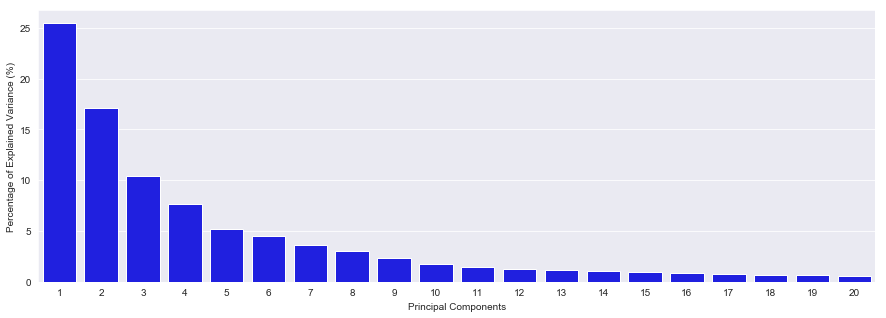

In [252]:
# O dataset inicial tem 77 dimensões(tipos de proteina)
# Reduzindo para 2 dimensões retem-se aproximadamente 43% da informação do dataset.
# Reduzindo para 3 dimensões retem-se aproximadamente 54% da informação do dataset.
# Reduzindo para 31 dimensões retem-se 95% da informação do dataset.
# Reduzindo para 20 dimensões retem-se 90% da informação do dataset.

sns.set_style("darkgrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

ax = sns.barplot(x=variancia.index, y="variância", data=variancia, color="blue")

ax.set_ylabel('Percentage of Explained Variance (%)')
ax.set_xlabel('Principal Components')

plt.show()

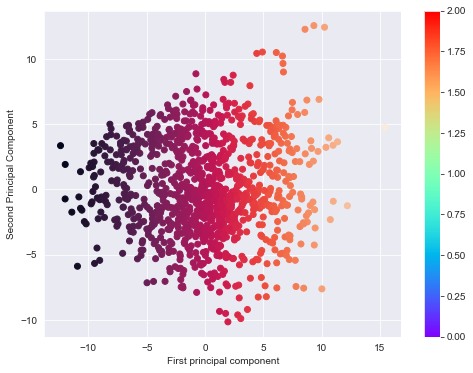

In [255]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1], c=X_pca[:,0])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.colorbar(p)

Optou-se por reduzir o número de dimensões para 20 de modo a reter 90% da informação

## Interpretação dos Componentes Principais

In [266]:
# Mesmo número de linhas e ordenação destas mas reduz o número de colunas de 77 para 20(redução da dimensionalidade).
# Não se reduziu o número de variaveis, porque cada uma dessas 20 colunas têm informação de várias variaveis
# (cada componente está correlacionado com várias variaveis como se pode ver pelo pca.components_.shape).
# O número de data point diminui porque se eliminaram colunas.
X_pca.shape

(1073, 20)

In [269]:
# Tem-se 20 componentes com correlção com 77 variaveis
pca.components_.shape

(20, 77)

In [276]:
# DataFrame com a correlação entre cada componente principal e as variaveis.
# Por exemplo o 1º componente principal tem um correlação de 0.051390 com a variavel DYRK1A_N.
df_comp = pd.DataFrame(pca.components_, columns=df.columns[1:-4], index=np.arange(1,21))

In [277]:
df_comp.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
1,0.051390,0.080103,0.196728,0.196550,0.182197,0.118160,0.122761,0.100627,0.165959,0.090174,...,-0.012480,-0.036015,-0.023468,0.090853,-0.058298,0.129385,-0.010695,-0.031024,-0.029124,0.022940
2,0.182720,0.192682,0.056207,0.073813,0.092176,-0.158556,-0.153785,-0.098990,-0.041435,0.111763,...,-0.107291,-0.152364,-0.142710,-0.136315,-0.139863,-0.019276,-0.125349,-0.180820,-0.173273,0.201006
3,0.119399,0.085502,0.070661,-0.040003,-0.033441,0.088335,0.113685,-0.046411,-0.012573,0.135221,...,-0.071262,0.091388,0.083668,-0.214456,0.035030,-0.130169,0.012053,0.019004,0.043188,-0.007678
4,0.022255,0.036628,0.006652,-0.061498,-0.123951,0.109405,0.084344,0.013797,0.123908,-0.046830,...,0.114768,0.143394,0.044817,-0.042324,0.034951,0.083320,0.216789,0.023577,0.143817,0.177236
5,-0.117599,-0.099463,-0.020052,0.040647,-0.018179,0.115068,0.063398,0.215389,0.103893,-0.110493,...,-0.098787,-0.115405,-0.215751,-0.073818,-0.203354,-0.076255,-0.029825,-0.152419,-0.136696,-0.058573


### Pré-processamento com PCA antes de utilizar o Knn

#### Normalização das variáveis

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(df.drop(["MouseID","class","Genotype","Treatment","Behavior"], axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
# Array normalizado
df_normalizado = scaler.transform(df.drop(["MouseID","class","Genotype","Treatment","Behavior"], axis=1))

In [18]:
# DataFrame normalizado
df_param = pd.DataFrame(df_normalizado, columns=df.columns[1:-4])

In [19]:
df_param.head(2)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.311613,0.515772,2.246935,1.492238,2.296529,-0.362630,-0.174765,-0.900934,0.600360,0.688467,...,-1.305096,-1.327878,0.000146,-1.064798,-0.989850,-0.286436,-1.011032,-1.412393,-1.604569,1.065853
1,0.355559,0.285067,1.874704,1.415117,1.969985,-0.538891,-0.354839,-0.963918,0.439216,0.357844,...,-0.907102,-1.553101,0.000146,-1.044747,-1.164336,-0.068966,-1.062738,-1.321261,-1.543687,1.279680


#### Principais Componentes e Rotação dos Eixos

In [53]:
from sklearn.decomposition import PCA

In [54]:
# n_componentes: número de Principais Componentes(Dimensões)
# Se for escolhido uma percentagem, o PCA encontra o nº de Componentes Principais que preserva essa percentagem de informação.
pca = PCA(n_components=0.9, svd_solver="full")

In [55]:
# Encontrar os Principais Componentes(Com os os autovectores e autovalores obtidos da matriz de covariância, ordenados por 
# ordem decrescente, escolher os autovectores que se mantêm(n_components) e construir com eles o vector de caracteristicas.
pca.fit(df_param)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [56]:
# Colocar os dados ao longo dos eixos dos Principais Componentes(multiplicação da matriz transposta do vector de 
# caracteristicas pela matriz transposta dos dados originais)
X_pca = pca.transform(df_param)

In [57]:
# Os 20 componentes comtêm 90 da informação dos dados originais
# O 1º Componente Principal contem 25% da informação dos dados originais
# O 2º Componente Principal contem 17% da informação dos dados originais.
print(pca.explained_variance_ratio_*100)

[25.47154675 17.07432683 10.40391882  7.62578965  5.19924667  4.52935681
  3.5738781   3.00607844  2.30167992  1.72834304  1.46791131  1.2512502
  1.13176347  1.02317184  0.97488283  0.84921819  0.76670393  0.71309377
  0.63417033  0.58895725]


#### Divisão Treino-Teste  

In [58]:
X = X_pca

In [59]:
#No KNN não é necessário passar a variavel a prever para quantitativa, o sklearn já faz isso.
y = df["class"]
y.head(1)

0    c-CS-m
Name: class, dtype: object

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
#São usados 30% dos dados do dataset para fazer o teste do modelo
#São usados 70% dos dados para treinar o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

#### Treinar e Ajaustar o modelo de KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
#Treinar o modelo de KNN com n=1
knn = KNeighborsClassifier(n_neighbors=3)

In [64]:
#Ajustar o modelo com as entradas de dados de treino às saidas de dados de treino
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

#### Previsão e avaliação do modelo

In [65]:
# Prever os dados de saida para os dados de teste de modo se poder fazer a avaliação do modelo
predictions = knn.predict(X_test)

In [66]:
data = pd.DataFrame({"y_test":np.array(y_test), "predictions":predictions})
data.head(2)

,y_test,predictions
0,c-SC-m,c-SC-m
1,t-CS-s,t-CS-s


In [67]:
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
#Relatório de classificação
#Ver como o modelo se ajusta para os dados de teste
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      c-CS-m       0.95      0.95      0.95        40
      c-CS-s       1.00      0.95      0.98        44
      c-SC-m       0.92      0.98      0.95        50
      c-SC-s       0.96      0.93      0.95        46
      t-CS-m       0.88      0.97      0.92        30
      t-CS-s       0.97      0.97      0.97        34
      t-SC-m       1.00      0.93      0.96        41
      t-SC-s       1.00      1.00      1.00        37

   micro avg       0.96      0.96      0.96       322
   macro avg       0.96      0.96      0.96       322
weighted avg       0.96      0.96      0.96       322



#### Escolher um valor K

Usar o método do cotovelo para escolher um bom Valor K:

In [69]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

Text(0, 0.5, 'Error Rate')

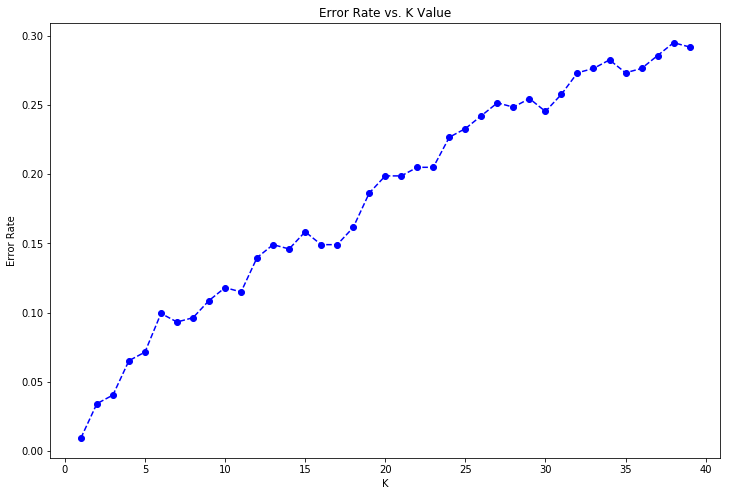

In [70]:
plt.figure(figsize=(12, 8))
plt.plot(range(1,40), error_rate,  color="blue", linestyle="dashed", marker="o")

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Para este caso a utilização do PCA antes do Knn não melhora o modelo, o que pode significar que o Knn neste caso não sofre da maldição da dimensionalidade.
Se a dimensionalidade for alterada para 2 o modelo piora.
O código para a utilização do PCA antes do k-Means seria identico(sem a parte de treino do modelo).


# Bibliografia <a name="bib"></a>

## Dados em falta
- https://medium.com/databootcamp/o-que-fazer-quando-faltam-dados-255ef5508a4f

## Transformação de variaveis categóricas em quantitativas 
- https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f
- https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/
  
  
- https://www.quora.com/Minmaxscaler-vs-Standardscaler-Are-there-any-specific-rules-to-use-one-over-the-other-for-a-particular-application
- https://datascience.stackexchange.com/questions/45900/when-to-use-standard-scaler-and-when-normalizer
- https://jovianlin.io/feature-scaling/ 

## Métricas de desempenho do algoritmo
- https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
- https://towardsdatascience.com/accuracy-recall-precision-f-score-specificity-which-to-optimize-on-867d3f11124

## Overfitting e Underfitting
### Regularização
- http://deeplearningbook.com.br/afinal-por-que-a-regularizacao-ajuda-a-reduzir-o-overfitting/
- http://deeplearningbook.com.br/overfitting-e-regularizacao-parte-2/
- https://medium.com/datadriveninvestor/l1-l2-regularization-7f1b4fe948f2

### Cross Validation
- https://stackoverflow.com/questions/29223149/sklearn-cross-validation-produces-different-results-than-manual-execution 
- https://stackoverflow.com/questions/32268592/different-results-between-using-train-test-split-and-cross-val-score-in-sklearn

## Tipos de Aprendizagem(Supervisionado e Não Supervisionado)
- https://medium.com/opensanca/aprendizagem-de-maquina-supervisionada-ou-n%C3%A3o-supervisionada-7d01f78cd80a
- https://stanford.edu/~shervine/l/pt/teaching/cs-229/dicas-aprendizado-supervisionado
- https://medium.com/brasil-ai/tipos-de-aprendizagem-1c1339f73bdf 
  

- https://datascience.stackexchange.com/questions/17645/is-overfitting-a-problem-in-unsupervised-learning

## Modelos Supervisionados

### Regressão Linear
- https://towardsdatascience.com/accuracy-recall-precision-f-score-specificity-which-to-optimize-on-867d3f11124
- http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Multivariable/BS704_Multivariable7.html

### K-Nearest Neighbors(KNN)
- https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761  
- https://medium.com/brasil-ai/knn-k-nearest-neighbors-1-e140c82e9c4e  
- https://medium.com/30-days-of-machine-learning/day-3-k-nearest-neighbors-and-bias-variance-tradeoff-75f84d515bdb
    
    
- https://stackoverflow.com/questions/50201315/is-numerical-encoding-necessary-for-the-target-variable-in-classification  

### Árvores de Decisão
- https://medium.com/greyatom/decision-trees-a-simple-way-to-visualize-a-decision-dc506a403aeb
- https://medium.com/machine-learning-beyond-deep-learning/%C3%A1rvores-de-decis%C3%A3o-3f52f6420b69
- https://www.wrprates.com/o-que-e-arvore-de-decisao-decision-tree-linguagem-r/

### Floresta Aleatória
- https://medium.com/machina-sapiens/o-algoritmo-da-floresta-aleat%C3%B3ria-3545f6babdf8
- https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm 
  

- https://stats.stackexchange.com/questions/198839/evaluate-random-forest-oob-vs-cv/199201

### Support Vector Machine
- https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72
- https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47
- https://www.saedsayad.com/support_vector_machine.htm
- https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-coding-edd8f1cf8f2d
- https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769
- http://qingkaikong.blogspot.com/2016/12/machine-learning-8-support-vector.html
  

- https://math.stackexchange.com/questions/782586/how-do-you-minimize-hinge-loss
- https://www.researchgate.net/post/Does_anyone_know_what_is_the_Gamma_parameter_about_RBF_kernel_function

## Modelos Não Supervisionados
### K-Means
- https://www.devmedia.com.br/data-mining-na-pratica-algoritmo-k-means/4584
- http://web.tecnico.ulisboa.pt/ana.freitas/bioinformatics.ath.cx/bioinformatics.ath.cx/index651a.html?id=147
- https://medium.com/datadriveninvestor/k-means-clustering-b89d349e98e6 
- https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
  
  
- https://stats.stackexchange.com/questions/53305/why-is-the-decision-boundary-for-k-means-clustering-linear
- https://stats.stackexchange.com/questions/99171/why-is-euclidean-distance-not-a-good-metric-in-high-dimensions/  
- https://stats.stackexchange.com/questions/256172/why-always-doing-dimensionality-reduction-before-clustering/256173

### Principal Components Analysis (PCA)
- https://medium.com/@davidstroud/principal-components-analysis-pca-9d97571a0e91
- https://medium.com/@kyasar.mail/pca-principal-component-analysis-729068e28ec8
- https://towardsdatascience.com/a-step-by-step-explanation-of-principal-component-analysis-b836fb9c97e2
- https://www.bi4all.pt/noticias/blog/o-que-e-o-pca/
- https://medium.com/@aptrishu/understanding-principle-component-analysis-e32be0253ef0
- https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
  

- https://medium.com/@sadatnazrul/the-dos-and-donts-of-principal-component-analysis-7c2e9dc8cc48
- https://stats.stackexchange.com/questions/114162/does-pca-preserve-observations-rows-of-the-data

#### Curse of Dimensionality
- https://towardsdatascience.com/curse-of-dimensionality-2092410f3d27
- https://medium.com/@fabiolenine/como-selecionar-atributos-para-resolver-a-maldi%C3%A7%C3%A3o-da-dimensionalidade-5c810bc8449f
- https://medium.com/@adityamohanty/curse-of-dimensionality-and-pca-f90f1258a7f2
- https://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/
- https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a
- https://towardsdatascience.com/https-medium-com-abdullatif-h-dimensionality-reduction-for-dummies-part-1-a8c9ec7b7e79
  

- https://towardsdatascience.com/dimensionality-reduction-does-pca-really-improve-classification-outcome-6e9ba21f0a32
- https://stats.stackexchange.com/questions/99171/why-is-euclidean-distance-not-a-good-metric-in-high-dimensions/
- https://stats.stackexchange.com/questions/157621/how-would-pca-help-with-a-k-means-clustering-analysis
- https://stats.stackexchange.com/questions/256172/why-always-doing-dimensionality-reduction-before-clustering
- https://datascience.stackexchange.com/questions/17216/pca-before-k-mean-clustering
- https://stats.stackexchange.com/questions/29084/how-to-decide-if-to-do-dimensionality-reduction-before-clustering
- https://stats.stackexchange.com/questions/12853/when-do-we-combine-dimensionality-reduction-with-clustering
- https://stats.stackexchange.com/questions/256172/why-always-doing-dimensionality-reduction-before-clustering/256173